<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV
import random
import pickle
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Reading Dataframe

In [2]:
df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;"> Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<hr>  <p style="font-family: verdona;"><b>Observations :</b>
<br>No Null Records
<br>Levy feature is numerical but there is some string value in it which makes  its data type object
<hr>

In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
df.describe(include=['O'])

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


<hr>  <p style="font-family: verdona;"><b> Observations :</b><br>Highly Imbalanced features :  Doors, Wheels<hr>

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">EDA & Data Cleaning

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Dropping duplicate records</center></b>

In [6]:
df[df.duplicated() == True].shape

(313, 18)

In [7]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [8]:
df[df.duplicated() == True].shape

(0, 18)

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Cleaning numeric features 

<Axes: >

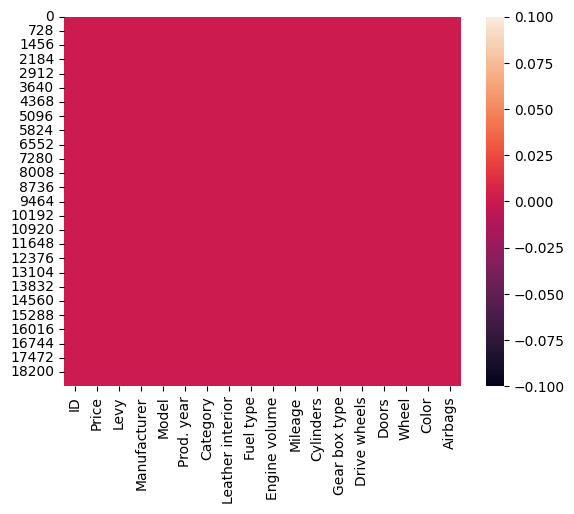

In [9]:
sns.heatmap(df.isnull(), cbar=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

<hr><p style="font-family: verdona;"><b>
Observation :</b><br>As seen above some features(Levy, Mileage, Engine Volume) can bee seen as numeric but are addressed as categorical type in .info method converting them to proper format<hr>

In [11]:
#extracting value which is making the 'Levy' feature object type
for unique in df['Levy'].unique():
    try : 
        int(unique)
    except:
        print(unique)

-


<hr><p style="font-family: verdona;"><b>
Conclusion : <br>
Levy -</b> This column refers to any additional taxes or fees associated with the vehicle.<br>
This means the rows with '-' value refers that there is no additional tax associated with that vehicle thus we'll replace it with 0.<hr>

In [12]:
df['Levy'] = df['Levy'].replace('-', 0)
df['Levy'] = df['Levy'].astype(int)
df['Levy'].dtype

dtype('int32')

In [13]:
# checking if all the records of Mileage feature contains km suffix
df[df['Mileage'].str.contains('km')].shape == df.shape

True

In [14]:
def mileage_handler(val):
    if 'km' in val : 
        val = int(val[:-2].strip())
    else :
        pass
    return val

In [15]:
df['Mileage']= df['Mileage'].apply(mileage_handler)
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<hr>  <p style="font-family: verdona;"><b>Observations :</b><br>
The Mileage feature seems to represent km's driven and not actual mileage of the cars, because there doesnt exist any car whose mileage is even close to 100(km) and all the records here show mileage in ten thousands(km).<hr>

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Feature Engineering

In [16]:
#extracting value which is making the 'Engine Volume' feature object type
for unique in df['Engine volume'].unique():
    try : 
        float(unique)
    except:
        print(unique)

2.0 Turbo
2.2 Turbo
3.0 Turbo
1.4 Turbo
1.5 Turbo
1.6 Turbo
2.3 Turbo
2.8 Turbo
1.8 Turbo
2.4 Turbo
3.5 Turbo
3.2 Turbo
1.3 Turbo
2.5 Turbo
1.9 Turbo
4.4 Turbo
4.7 Turbo
0.2 Turbo
4.8 Turbo
4.6 Turbo
1.2 Turbo
1.7 Turbo
6.3 Turbo
2.7 Turbo
2.9 Turbo
4.0 Turbo
3.6 Turbo
3.7 Turbo
5.5 Turbo
2.1 Turbo
0.7 Turbo
0.6 Turbo
1.0 Turbo
4.5 Turbo
0.8 Turbo
4.2 Turbo
5.0 Turbo
5.7 Turbo
0.4 Turbo
5.4 Turbo
0.3 Turbo
1.1 Turbo


<hr><p style="font-family: verdona;"><b>
Conclusion : <br></b>
1. We can create two features <br>
&emsp;&emsp;1)"Engine Volume" which contains just the engine volume <br>
&emsp;&emsp;2)"Turbo" can be a binary feature determining the presence of Turbo(yes/no)
    <hr>

In [17]:
def eng_vol_handler():
    turbos = list()
    values = list()
    for val in df['Engine volume']:
        try : 
            val = float(val)
            turbo = 'No'
        except:
            val = val.split(' ')[0]
            turbo = 'Yes'
        turbos.append(turbo)
        values.append(val)
    return turbos,values

In [18]:
df['Turbo'], df['Engine Volume']= eng_vol_handler()
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,No,1.3


In [19]:
#now we can drop the old 'Engine volume variable
df.drop(columns=['Engine volume'], inplace=True)
df['Engine Volume'] = df['Engine Volume'].astype(float)
print(df['Engine Volume'].dtype)
df.head()

float64


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,No,1.3


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Handling Imbalanced features

In [20]:
#from df.describe we were able to figure out these two columns are highly imbalanced 
df['Doors'] = df['Doors'].map({'04-May':'4','02-Mar':'2', '>5': '5+'})
df['Wheel'] = df['Wheel'].map({'Right-hand drive': 'Right steer','Left wheel': 'Left steer'})

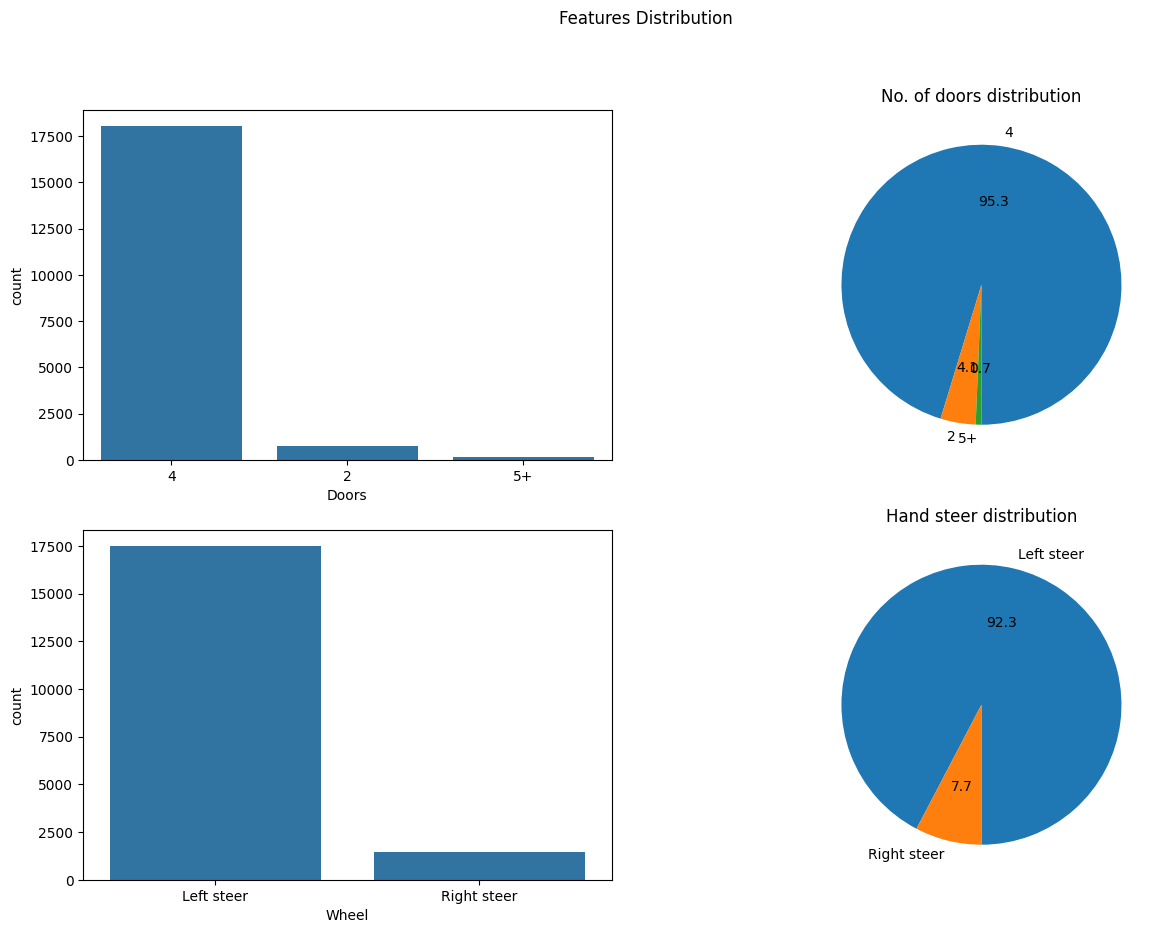

In [21]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
doors_dist = df['Doors'].value_counts()
wheels_dist = df['Wheel'].value_counts()
fig.suptitle('Features Distribution')
sns.countplot(x=df['Doors'], ax=axes[0,0])
sns.countplot(x=df['Wheel'], ax=axes[1,0])
axes[0,1].set_title('No. of doors distribution')
axes[0,1].pie(x=doors_dist.values,labels=doors_dist.index, autopct='%.1f',startangle=270)
axes[1,1].set_title('Hand steer distribution')
axes[1,1].pie(x=wheels_dist.values,labels=wheels_dist.index, autopct='%.1f',startangle=270)
plt.show()

<hr><p style="font-family: verdona;"><b>Observation :</b><br>
1. Doors feature has three uniques and majority distribution is occupied the value '4' leaving less than 1% records with value '5+' and less than 5% records with value '2'.<br>
2. Wheels feature is a binary feature where Left hand steer has majority distribution but Right hand steer also has significant distribution.
<p style="font-family: verdona;">
<b>Conclusion : </b><br>
1. Dropping features with more than 95% imbalance i.e. Doors feature<hr>

In [22]:
df.drop(columns=['Doors'], inplace=True)
df['Wheel'] = df['Wheel'].map({'Right steer': 1,'Left steer': 0})
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Visualizing numeric features

In [23]:
numeric_features = df.select_dtypes(include=['float','int']).columns.tolist()
numeric_features.pop(1)
numeric_features

['ID',
 'Levy',
 'Prod. year',
 'Mileage',
 'Cylinders',
 'Wheel',
 'Airbags',
 'Engine Volume']

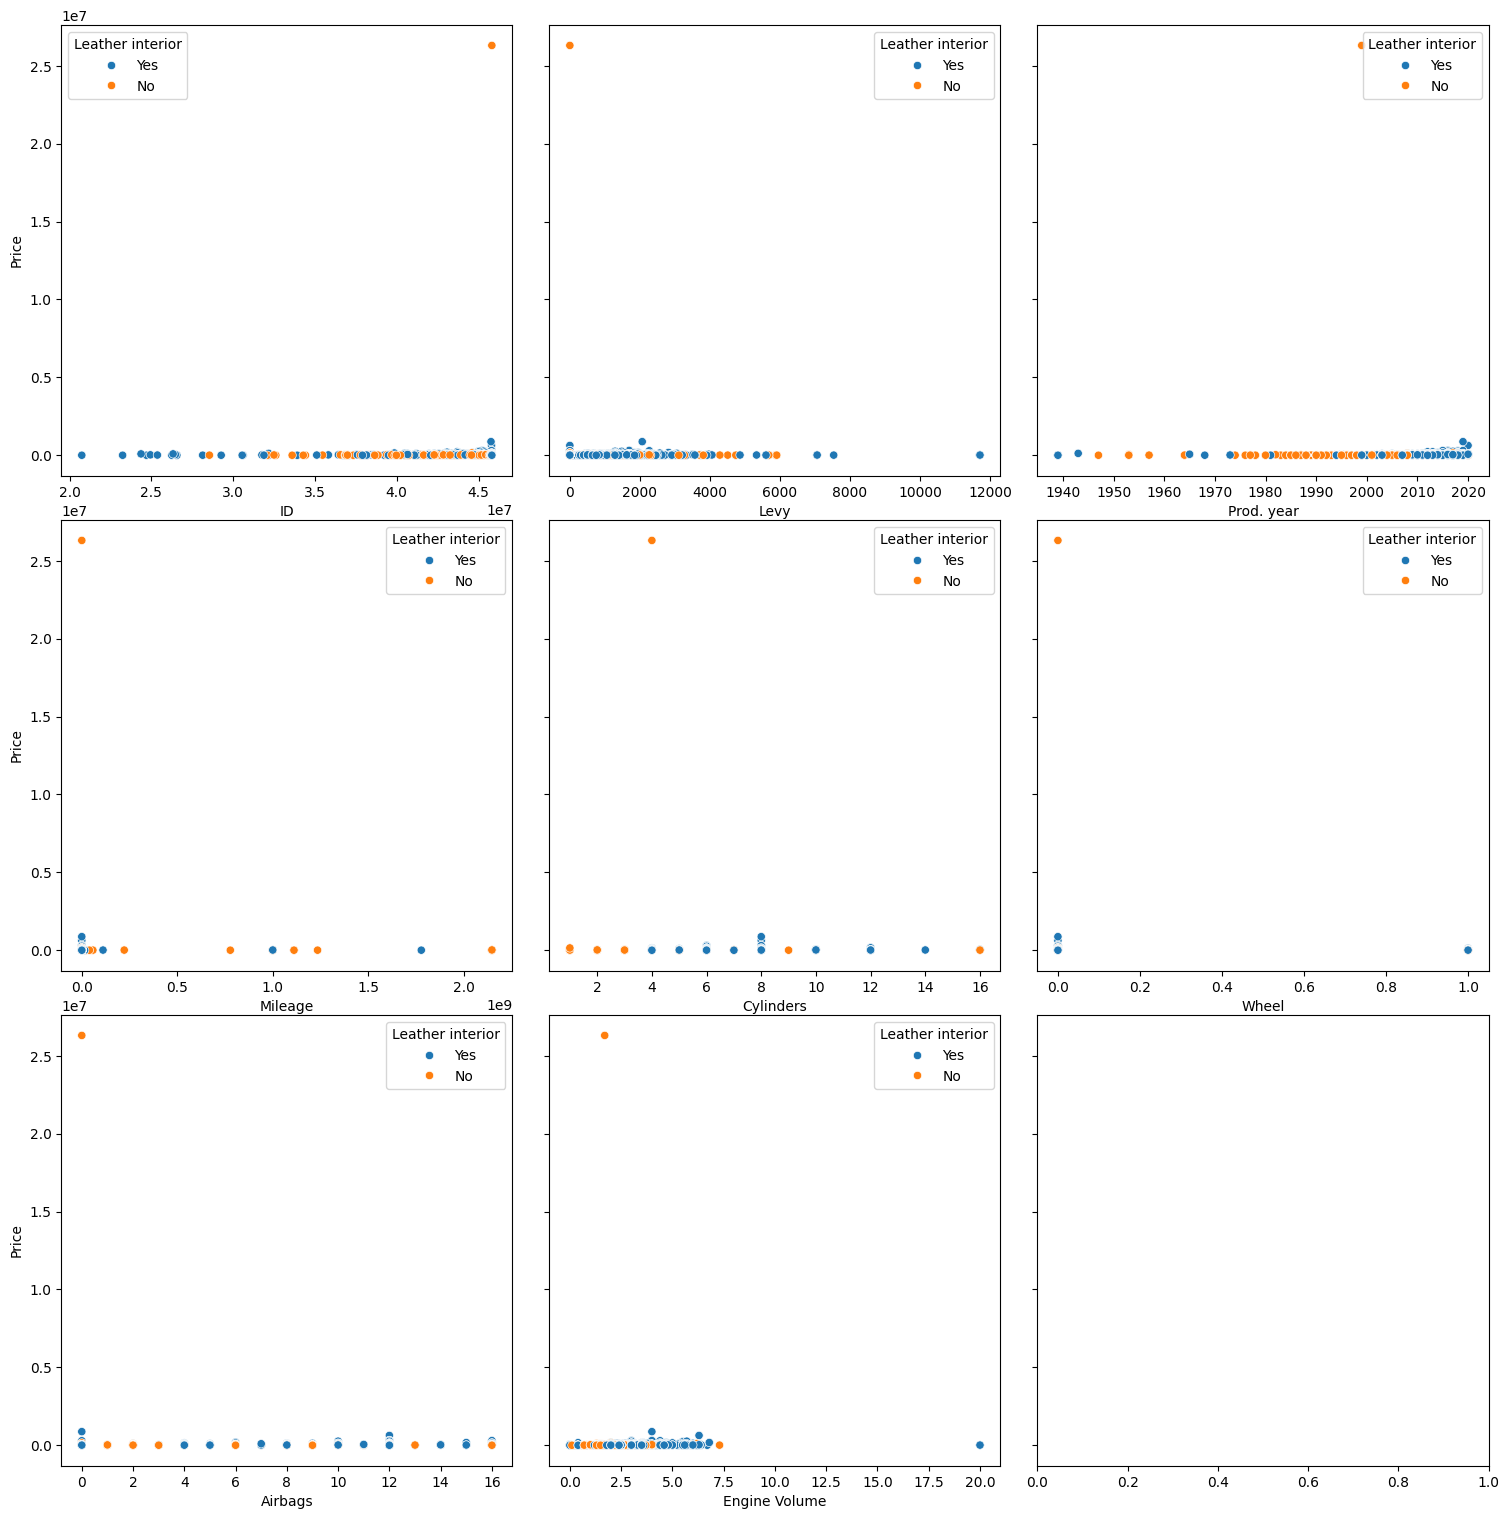

In [24]:
# now we can plot the numerical features and see their correlation with the target feature
fig, axes = plt.subplots(3, 3, figsize=(15,15), sharey='all')
fig.tight_layout() 
current_col = 0
for i in range(3):
    for j in range(3):
        try:
            sns.scatterplot(x=df[numeric_features[current_col]], y=df['Price'],hue=df['Leather interior'], ax=axes[i,j])
            current_col+=1
        except:
            pass
plt.show()

<hr>  <p style="font-family: verdona;"><b> Observations :</b><br>Outliers detected which are restricting from getting insights from data
<p style="font-family: verdona;"><b> Conclusion :</b><br>We will first drop only the target feature outlier then we will see if the outliers exist in the other features as well and take steps accordingly<hr>

In [25]:
df = df[df['Price'] < 0.5e7]
print(df.shape)
df.head()

(18923, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


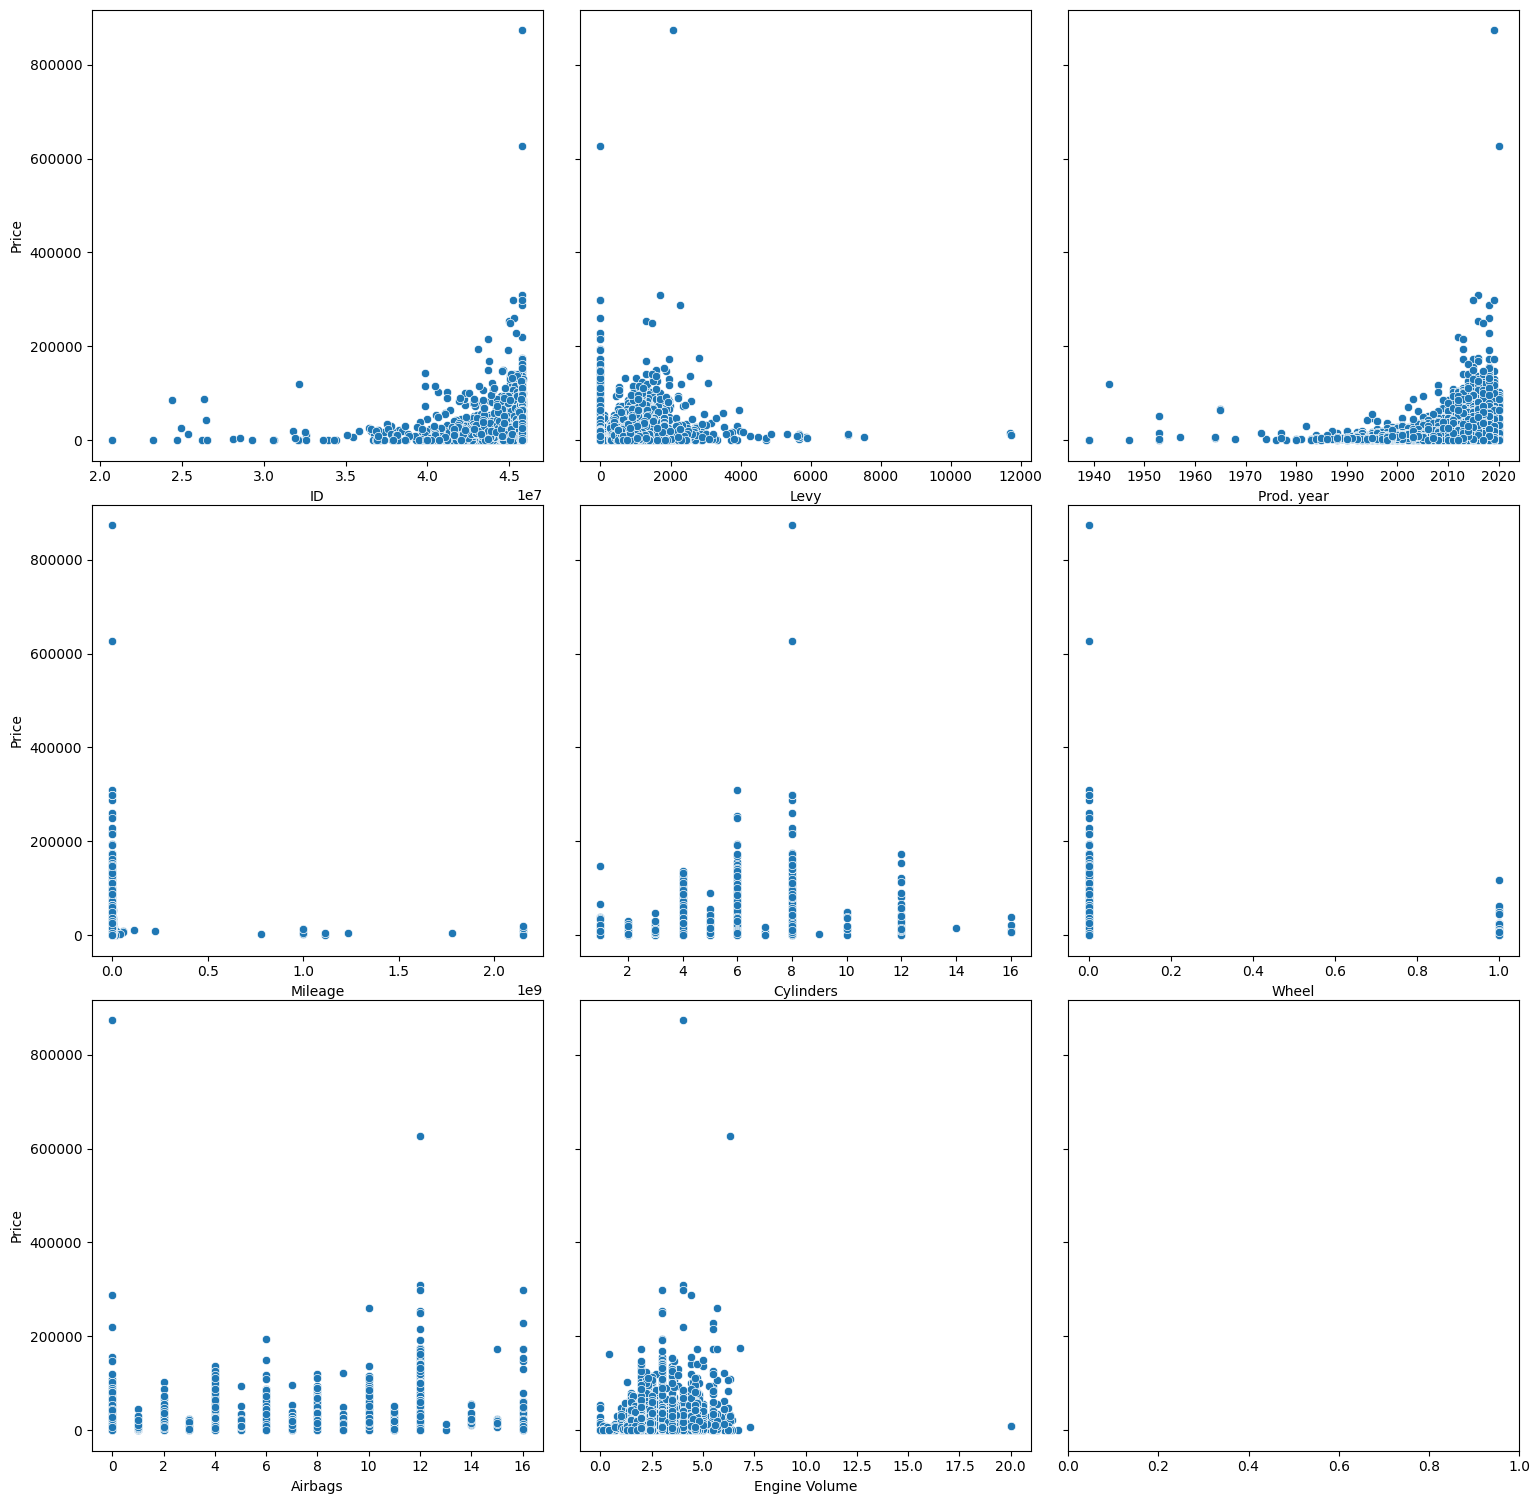

In [26]:
# now we can plot the numerical features and see their correlation with the target feature
fig, axes = plt.subplots(3, 3, figsize=(15,15), sharey='all')
fig.tight_layout() 
current_col = 0
for i in range(3):
    for j in range(3):
        try:
            sns.scatterplot(x=df[numeric_features[current_col]], y=df['Price'], ax=axes[i,j])
            current_col+=1
        except:
            pass
plt.show()

In [27]:
df[df['Price'] > 600000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
1224,45795524,627220,0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,0,8.0,Tiptronic,4x4,0,Black,12,Yes,6.3
8456,45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,2531,8.0,Tiptronic,4x4,0,Black,0,No,4.0


In [28]:
df = df[df['Price'] < 600000]
print(df.shape)
df.head()

(18921, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


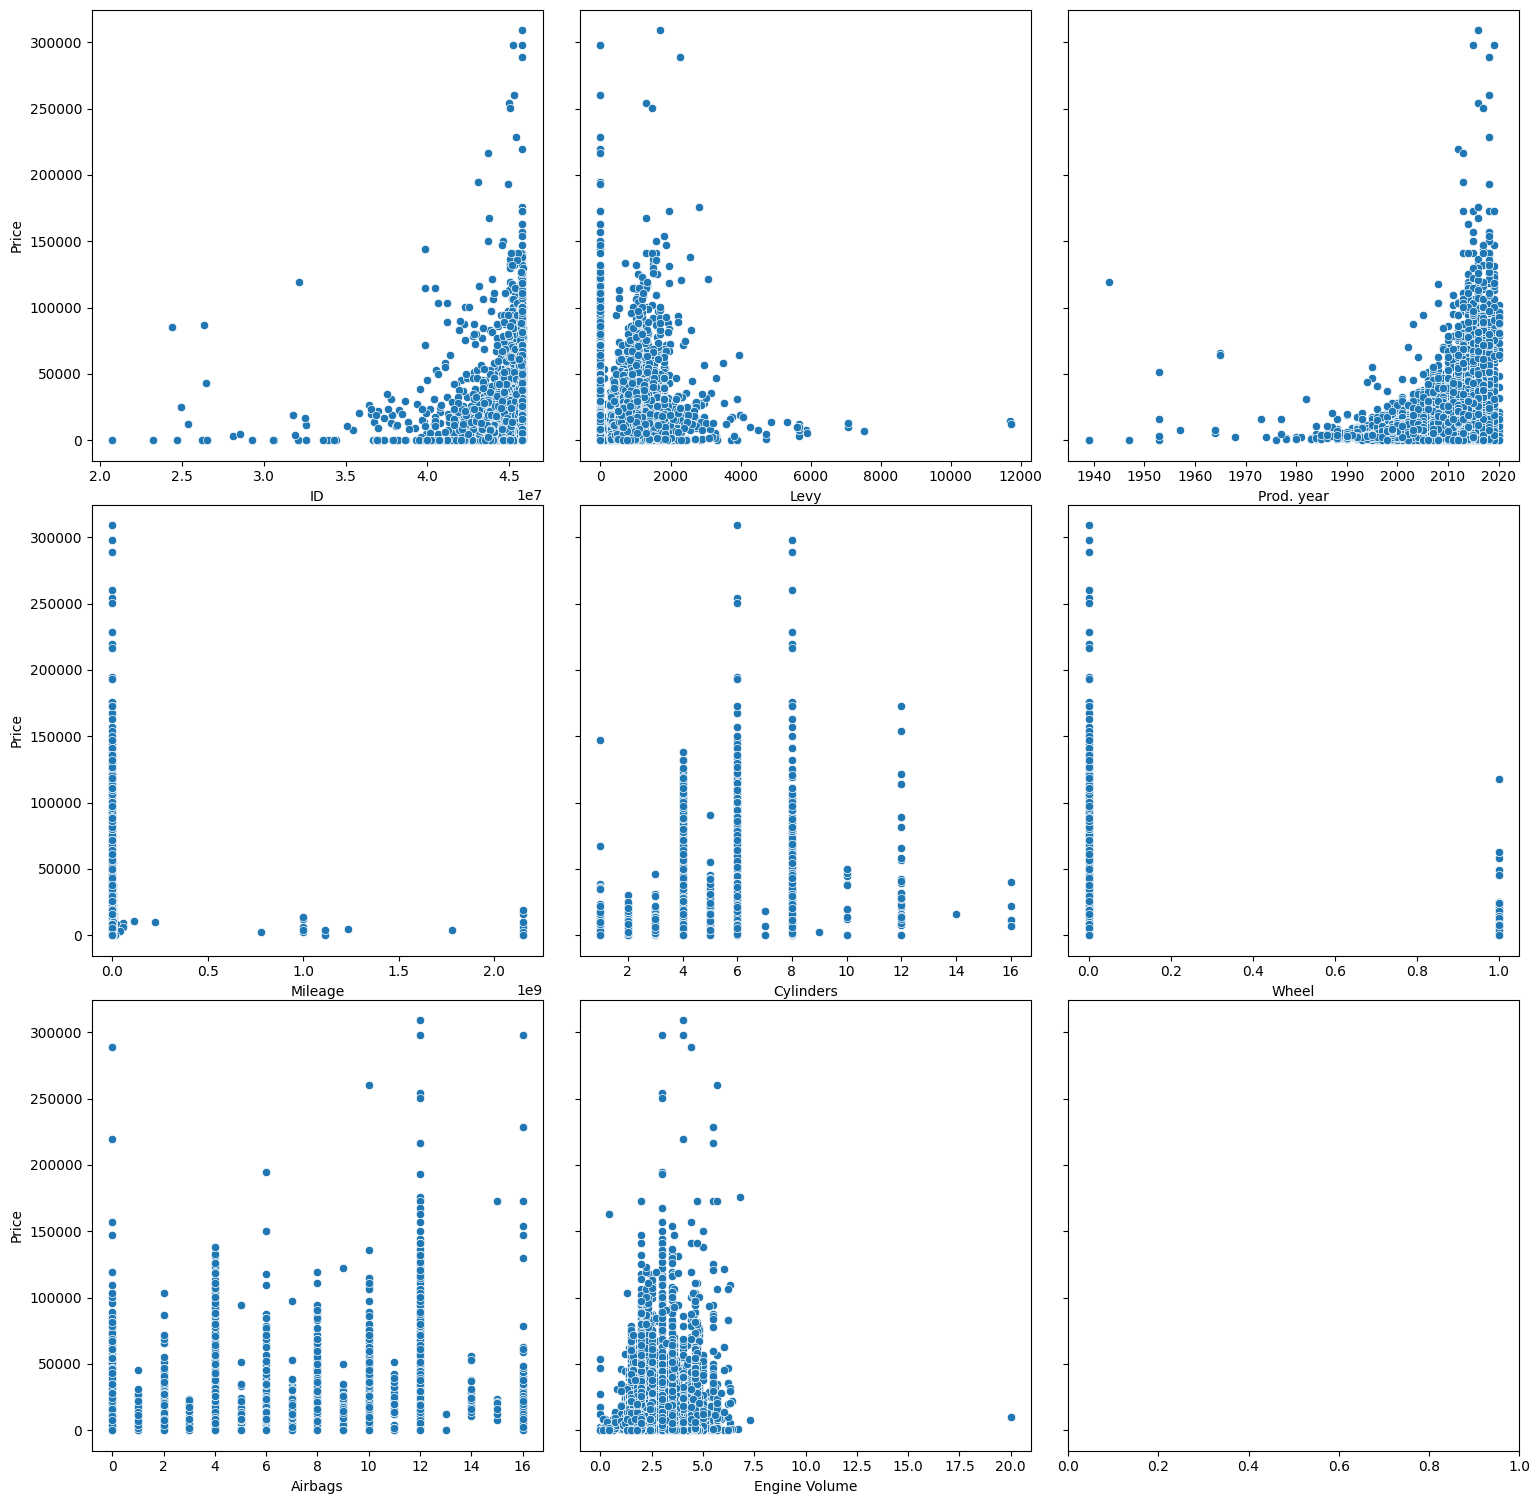

In [29]:
# now we can plot the numerical features and see their correlation with the target feature
fig, axes = plt.subplots(3, 3, figsize=(15,15), sharey='all')
fig.tight_layout() 
current_col = 0
for i in range(3):
    for j in range(3):
        try:
            sns.scatterplot(x=df[numeric_features[current_col]], y=df['Price'],ax=axes[i,j])
            current_col+=1
        except:
            pass
plt.show()

<hr> <p style="font-family: verdona;"><b>Observation</b><br>
There exists records where the vehicle Price is close to $0 which is completely unrealistic .

<p style="font-family: verdona;"><b>Domain knowledge :</b><br>
No car can have Price below $1000, seems like faulty records but just for safer side, we'll eliminate records where the price is $500 and less <hr>

In [30]:
df[df['Price'] <= 500]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
27,45804684,30,0,TOYOTA,Prius,2008,Sedan,No,Hybrid,169000,4.0,Automatic,Front,0,White,8,No,1.5
33,45770026,125,1750,TOYOTA,Highlander,2008,Sedan,Yes,Hybrid,287274,6.0,Automatic,4x4,0,White,12,No,3.3
39,45661296,314,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,382746,6.0,Automatic,4x4,0,Silver,12,No,3.5
45,45769564,220,1194,TOYOTA,Tacoma,2013,Jeep,Yes,Petrol,239342,6.0,Automatic,4x4,0,Silver,12,No,4.0
53,45769316,392,1017,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,1600,4.0,Automatic,Rear,0,Black,12,No,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18902,45763841,470,831,HYUNDAI,Elantra,2017,Sedan,Yes,Petrol,25635,4.0,Automatic,Front,0,Black,12,No,1.6
18905,45748699,30,0,NISSAN,Note,2006,Hatchback,No,Petrol,0,4.0,Automatic,Front,1,Green,9,No,1.3
18916,39977395,50,0,TOYOTA,Prius,2008,Hatchback,No,Hybrid,150000,4.0,Automatic,Front,0,Silver,6,No,1.5
18917,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,307325,4.0,Automatic,Front,0,Silver,12,No,1.8


In [31]:
df = df[df['Price'] > 500]
print(df.shape)
df.head()

(17286, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr>  <p style="font-family: verdona;">Now we have eliminated all the extreme outliers in the Target feature with visual analysis<hr>

<p style="font-family: verdona;">
<br>1)The ID feature shows correlation i.e. when the IDs are low the the price of the car is also on the lower side
<br>➤If we wouldve known on what basis the IDs have been assigned :<br>
&emsp;&emsp;✦We must check if the data is not sorted as per IDs, which can affect the data if splitted without shhuffling and shuffle it<br>
➤But since we dont know and supposing IDs are assigned as per the order of scrapping .<br>
&emsp;&emsp;✦We will drop the feature as it will lead the model to misinterpret prices affected by the IDs.<br>


In [32]:
df.drop(columns=['ID'],inplace=True)
numeric_features.remove('ID')
print(df.shape)
df.head()

(17286, 17)


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Outlier Handling

In [33]:
df[numeric_features]

,Levy,Prod. year,Mileage,Cylinders,Wheel,Airbags,Engine Volume
0,1399,2010,186005,6.0,0,12,3.5
1,1018,2011,192000,6.0,0,8,3.0
2,0,2006,200000,4.0,1,2,1.3
3,862,2011,168966,4.0,0,0,2.5
4,446,2014,91901,4.0,0,4,1.3
...,...,...,...,...,...,...,...
18918,1055,2013,107800,6.0,0,12,3.5
18919,0,1999,300000,4.0,0,5,2.0
18920,831,2011,161600,4.0,0,8,2.4
18921,836,2010,116365,4.0,0,4,2.0


<hr> <p style="font-family: verdona;">
extracting only continous values features
<hr>

In [34]:
numeric_features.remove('Cylinders')
numeric_features.remove('Airbags')
numeric_features.remove('Wheel')

<hr> <p style="font-family: verdona;">
now we can plot the numerical features and see their respective outliers
<hr>

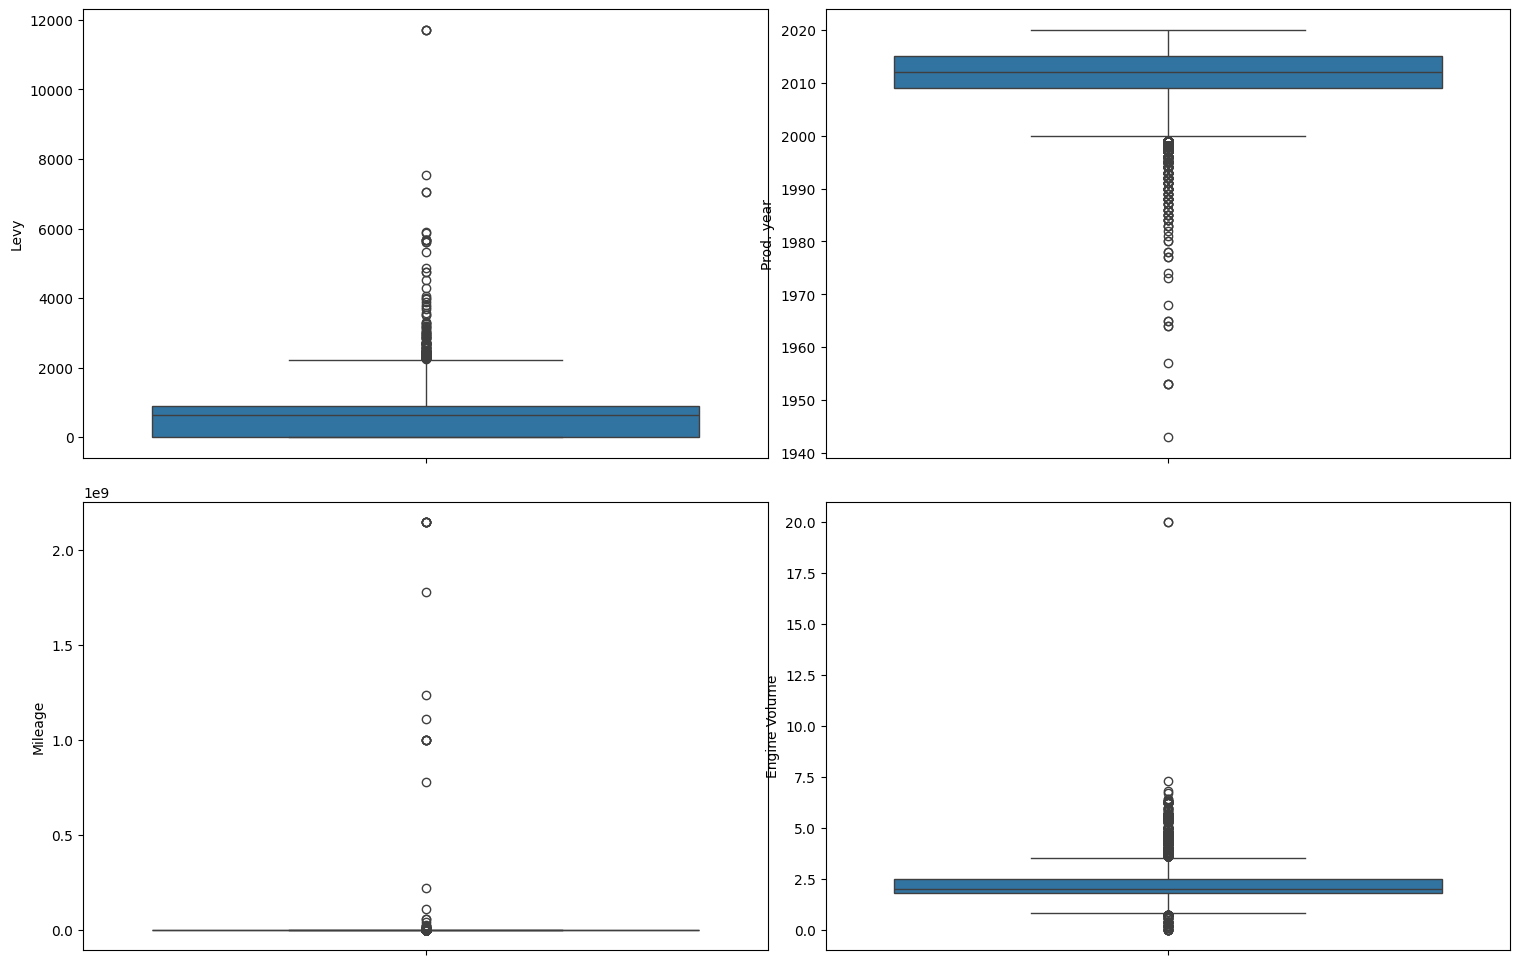

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout() 
current_col = 0
for i in range(2):
    for j in range(2):
        try:
            sns.boxplot(y=df[numeric_features[current_col]],ax=axes[i,j])
            current_col+=1
        except:
            pass
plt.show()

<hr><p style="font-family: verdona;">Using IQR method to handle Outliers
<hr>

In [36]:
def Outlier_counter(data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    outliers = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])
    return outliers, lower_bound, upper_bound

In [37]:
# Too time taking to plot 

# fig, ax = plt.subplots(ncols=3, nrows=(len(numeric_features)+1)//3, figsize=(15,10))
# axes = ax.flatten()
# try:
#     for i in range(len(numeric_features)):  # Go through all the continuous columns
#         sns.histplot(x=df[numeric_features[i]], ax=axes[i], color='c', kde=True)
#         outlier, lb, ub = Outlier_counter(df, numeric_features[i])
#         title = f'No. of outliers:  {outlier}'
#         axes[i].set_title(title, color='r')
#         axes[i].axvline(lb, c='c', linestyle='--', label='Lower bound')
#         axes[i].axvline(ub, c='r', linestyle='--', label='Upper bound')
#         plt.subplots_adjust(hspace=0.5, wspace=0.5)
#     plt.savefig('Outlier_plot.png')
#     plt.show()
# except IndexError:
#     pass

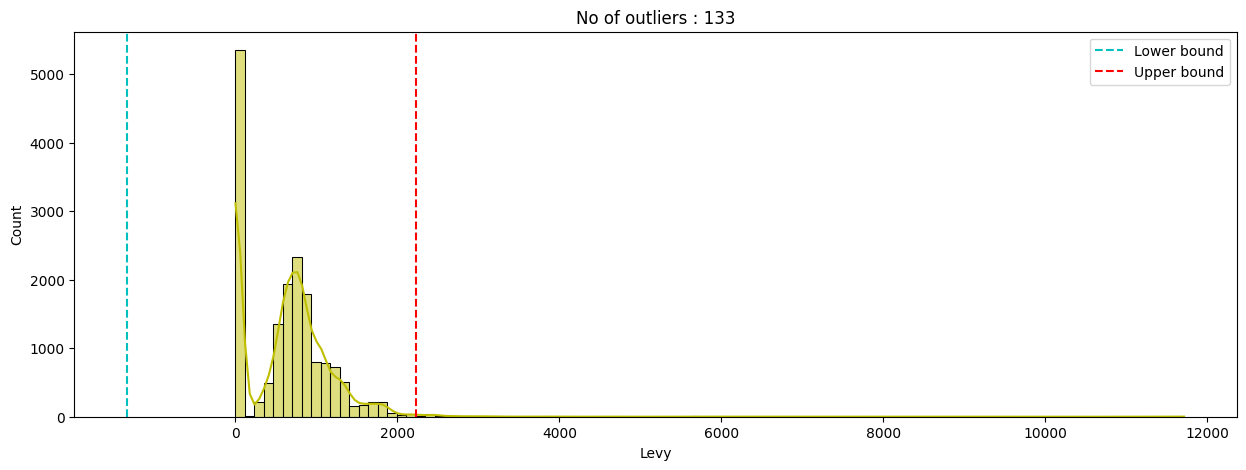

In [38]:
plt.figure(figsize=(15,5))
sns.histplot(df[numeric_features[0]],color='y', kde=True, bins=100)
outliers_cnt, lb_levy, ub_levy = Outlier_counter(df, numeric_features[0])
plt.title(f'No of outliers : {outliers_cnt}')
plt.axvline(lb_levy, c='c', linestyle='--', label='Lower bound')
plt.axvline(ub_levy, c='r', linestyle='--', label='Upper bound')
plt.legend()
plt.show()

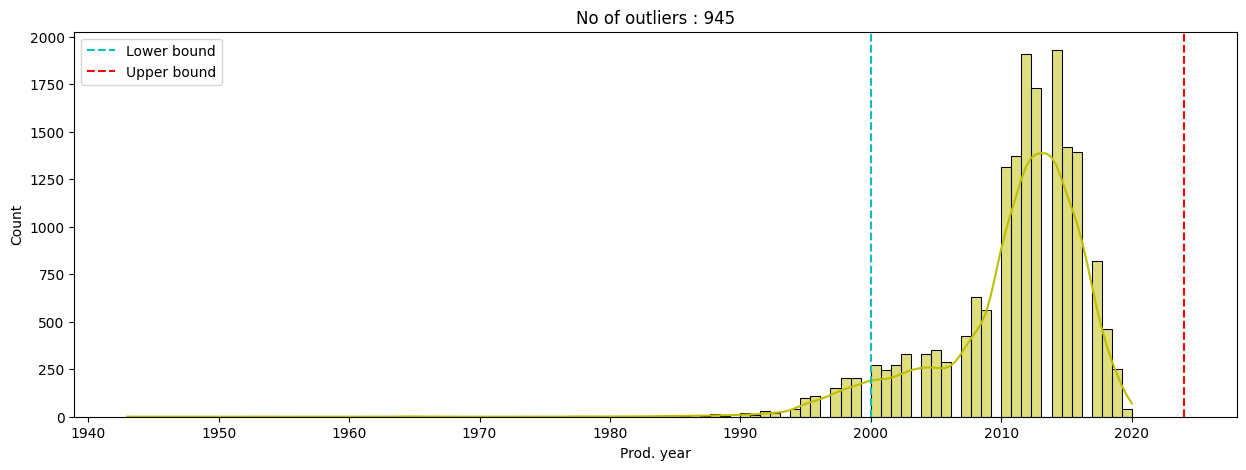

In [39]:
plt.figure(figsize=(15,5))
sns.histplot(df[numeric_features[1]],color='y', kde=True, bins=100)
outliers_cnt, lb_yr, ub_yr = Outlier_counter(df, numeric_features[1])
plt.title(f'No of outliers : {outliers_cnt}')
plt.axvline(lb_yr, c='c', linestyle='--', label='Lower bound')
plt.axvline(ub_yr, c='r', linestyle='--', label='Upper bound')
plt.legend()
plt.show()

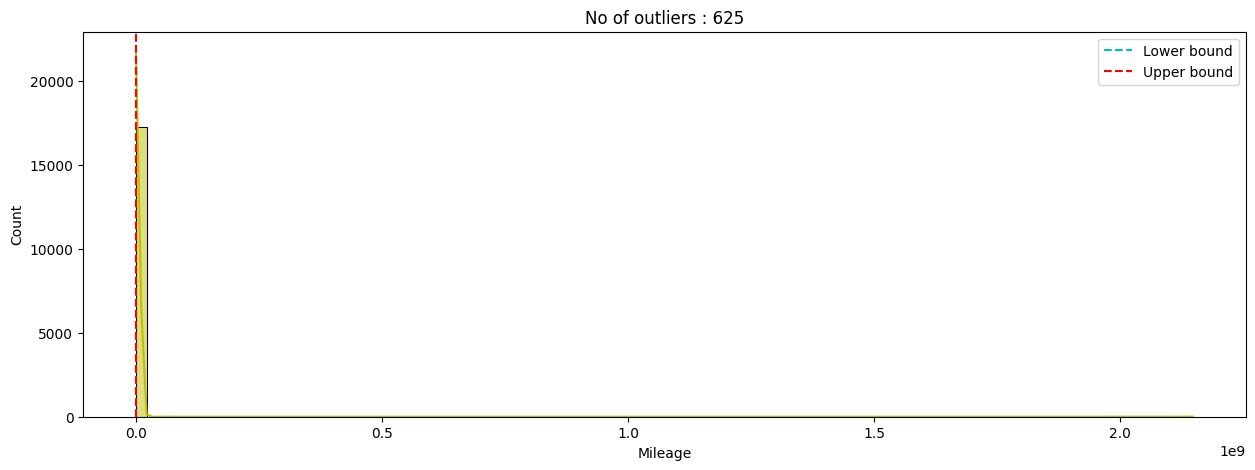

In [40]:
plt.figure(figsize=(15,5))
sns.histplot(df[numeric_features[2]],color='y', kde=True, bins=100)
outliers_cnt, lb_mil, ub_mil = Outlier_counter(df, numeric_features[2])
plt.title(f'No of outliers : {outliers_cnt}')
plt.axvline(lb_mil, c='c', linestyle='--', label='Lower bound')
plt.axvline(ub_mil, c='r', linestyle='--', label='Upper bound')
plt.legend()
plt.show()

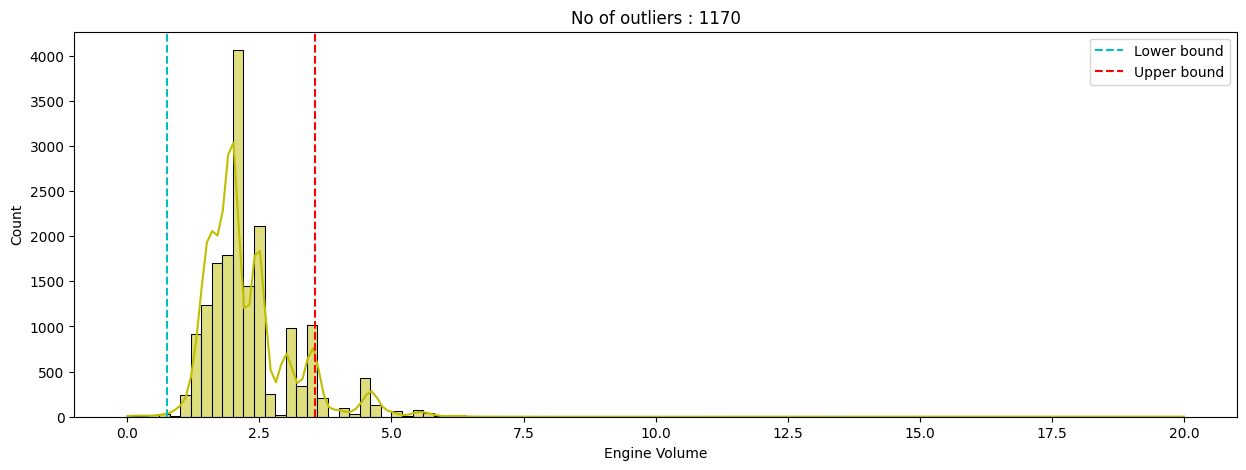

In [41]:
plt.figure(figsize=(15,5))
sns.histplot(df[numeric_features[3]],color='y', kde=True, bins=100)
outliers_cnt, lb_eng, ub_eng = Outlier_counter(df, numeric_features[3])
plt.title(f'No of outliers : {outliers_cnt}')
plt.axvline(lb_eng, c='c', linestyle='--', label='Lower bound')
plt.axvline(ub_eng, c='r', linestyle='--', label='Upper bound')
plt.legend()
plt.show()

In [42]:
def Outlier_trimmer(data, col, lower_bound, upper_bound):
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [43]:
new_df = df.copy()
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


In [44]:
bounds = [(lb_levy, ub_levy),(lb_yr, ub_yr),(lb_mil, ub_mil),(lb_eng, ub_eng)]
bounds

[(-1336.5, 2227.5),
 (2000.0, 2024.0),
 (-102824.0, 358216.0),
 (0.7500000000000002, 3.55)]

In [45]:
print('Original shape - ',new_df.shape)
for i,j in zip(numeric_features,bounds):
    print('Feature : ', i, ' lower bound - ' ,j[0], ' upper bound - ',j[1])
    new_df = Outlier_trimmer(new_df, i, j[0],j[1])
    print('New shape - ',new_df.shape)

Original shape -  (17286, 17)
Feature :  Levy  lower bound -  -1336.5  upper bound -  2227.5
New shape -  (17153, 17)
Feature :  Prod. year  lower bound -  2000.0  upper bound -  2024.0
New shape -  (16218, 17)
Feature :  Mileage  lower bound -  -102824.0  upper bound -  358216.0
New shape -  (15676, 17)
Feature :  Engine Volume  lower bound -  0.7500000000000002  upper bound -  3.55
New shape -  (14652, 17)


In [46]:
new_df.reset_index(inplace=True)
new_df.drop(columns=['index'],inplace=True)
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">checking if any imbalanced data is affected by trimming<hr>

In [47]:
lost = pd.DataFrame(columns=['Column', 'Old Data', 'New Data', 'Uniques Lost', 'Data Type'])
for col in df.columns:
    dtype = df[col].dtype
    diff = len(df[col].unique()) - len(new_df[col].unique())
    lost.loc[len(lost.index)] = [col, len(df[col].unique()), len(new_df[col].unique()), diff, dtype]
lost

,Column,Old Data,New Data,Uniques Lost,Data Type
0,Price,2248,2151,97,int64
1,Levy,545,373,172,int32
2,Manufacturer,63,56,7,object
3,Model,1565,1251,314,object
4,Prod. year,51,21,30,int64
5,Category,11,11,0,object
6,Leather interior,2,2,0,object
7,Fuel type,7,7,0,object
8,Mileage,7256,6432,824,int64
9,Cylinders,13,12,1,float64


<hr><p style="font-family: verdona;"> We can see there is no complete elimination of a single class where the data type is object and the number of uniques is less, this denotes the IQR method is a good approach for this case<hr>
<hr> <p style="font-family: verdona;">
Analyzing "Levy" feature
<hr>

In [48]:
#                      Graph 2 data
#======================================================================
levy_range = [x for x in range(0,int(new_df['Levy'].max()+100)) if x%100==0]
levy_price_range = list()
for x in levy_range:
    mean = new_df[(new_df['Levy'] >= x-100) & (new_df['Levy'] <= x)]['Price'].mean()
    try :
        mean = int(mean)
        levy_price_range.append(mean)
    except : 
        levy_price_range.append(0)

#                      Graph 3 data
#======================================================================
levy_corr = new_df.select_dtypes(include=['float', 'int']).corr()['Levy']
levy_corr_df = pd.DataFrame(levy_corr)
levy_corr_df = levy_corr_df.sort_values('Levy')

#                      Graph 4 data
#======================================================================
min, max = new_df['Prod. year'].min(), new_df['Prod. year'].max()
yr_l = list()
levy_90 = list()
levy_75 = list()
levy_50 = list()

cur_yr = min
while cur_yr <= max:
    yr_l.append(cur_yr)
    levy_90.append(np.percentile(new_df[new_df['Prod. year'] == cur_yr]['Levy'], 90))
    levy_75.append(np.percentile(new_df[new_df['Prod. year'] == cur_yr]['Levy'], 75))
    levy_50.append(np.percentile(new_df[new_df['Prod. year'] == cur_yr]['Levy'], 50))
    cur_yr+=1

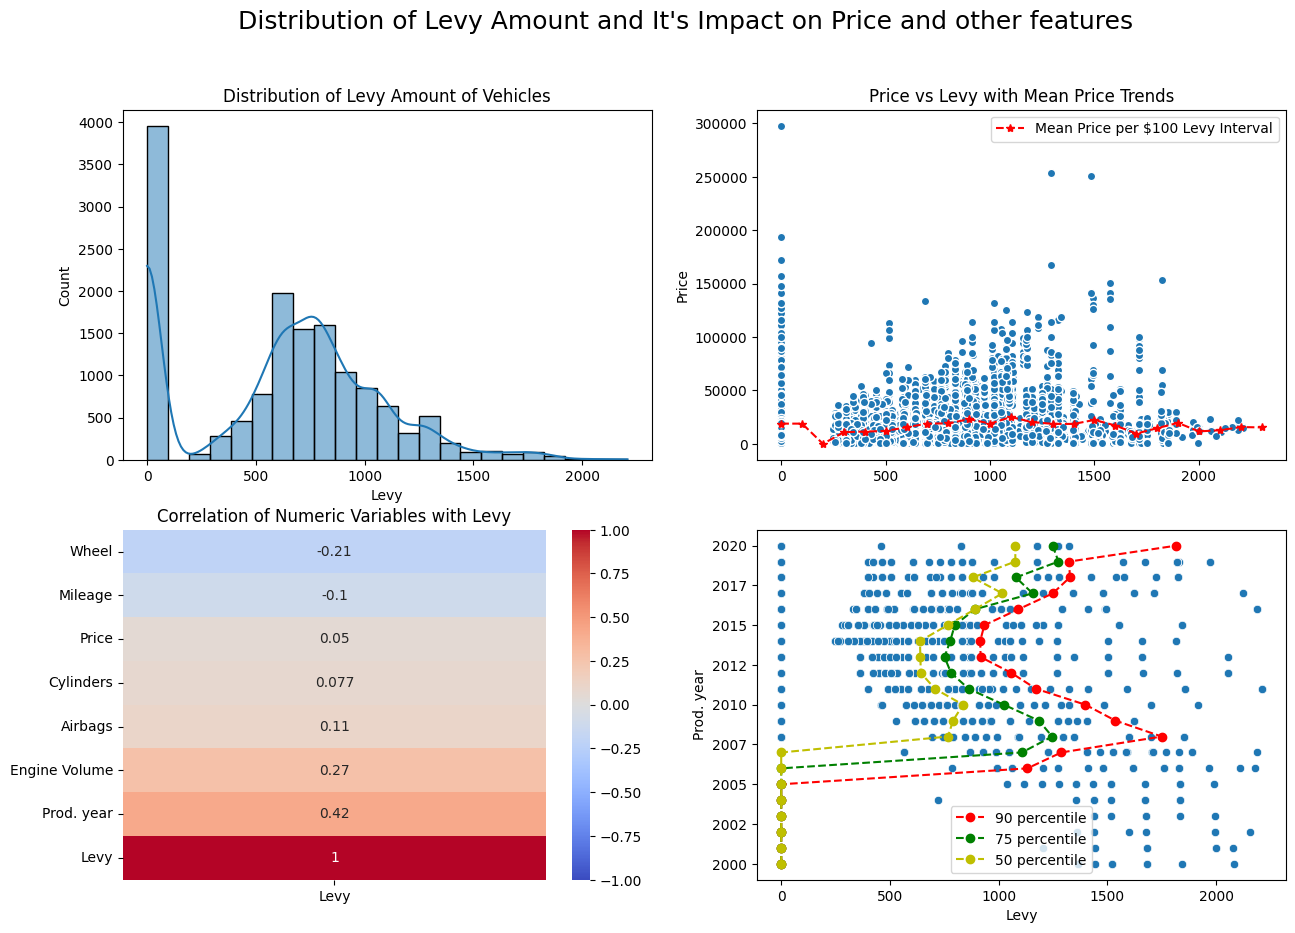

In [49]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
fig.suptitle("Distribution of Levy Amount and It's Impact on Price and other features", fontsize=18)

#                       Plotting graph 1
#==========================================================================
axes[0,0].set_title('Distribution of Levy Amount of Vehicles')
sns.histplot(new_df['Levy'], bins=len(levy_range)-1,kde=True, ax=axes[0,0])

#                       Plotting graph 2
#==========================================================================
axes[0,1].set_title('Price vs Levy with Mean Price Trends')
axes[0,1].set_ylabel('Price')
axes[0,1].scatter(x=new_df['Levy'], y=new_df['Price'], edgecolor='white')
axes[0,1].plot(levy_range, levy_price_range, c='r',linestyle="--", marker="*", label="Mean Price per $100 Levy Interval")
axes[0,1].legend()

#                       Plotting graph 3
#==========================================================================
sns.heatmap(levy_corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            ax=axes[1, 0])
axes[1, 0].set_title('Correlation of Numeric Variables with Levy')

#                       Plotting graph 4
#==========================================================================
sns.scatterplot(x=new_df['Levy'], y=new_df['Prod. year'], ax=axes[1,1])
axes[1,1].plot(levy_90, yr_l, c='r', linestyle="--", marker="o", label="90 percentile")
axes[1,1].plot(levy_75, yr_l, c='g', linestyle="--", marker="o", label="75 percentile")
axes[1,1].plot(levy_50, yr_l, c='y', linestyle="--", marker="o", label="50 percentile")
axes[1,1].yaxis.set_major_locator(plt.AutoLocator())
axes[1,1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{int(x)}"))
axes[1,1].legend()

plt.show()

<hr> <center><p style="font-family: verdona;"><b>EDA insights  
<br><hr>GRAPH 1</b><br></center><p style="font-family: verdona;">
The 'Levy' distribution appears normal but with a left skew due to a peak at zero. Graph 4 suggests this peak likely represents cars manufactured before 2005, which seem to have no Levy charge. Therefore, the zero Levy values are probably associated with pre-2005 vehicles.
<br><hr><center><b>GRAPH 2</b><br></center><p style="font-family: verdona;">
There appears to be no strong correlation between the levy imposed on a vehicle and its price. The mean price remains relatively stable across each $100 levy interval, showing no significant fluctuation in car prices as the levy amount increases . 
<br><hr><center><b>GRAPH 3</b><br></center><p style="font-family: verdona;">
1. We can see 'Prod. year' has the strongest positive correlation (41%) with 'Levy' and newer cars tend to have higher 'Levy' charges.<br>
2. 'Engine Volume' has moderate positive correlation(27%) .Larger engines are associated with higher Levy . The correlation could be higher but is not as they are produced before the year 2005 (From Graph 4).<br>
3. 'Wheel' has moderate negative correlation (-20%) possibly indicates right-hand drive vehicles have lower Levy.<br>
4. 'Airbags' has weak positive correlation(10%) and suggests more airbags slightly increase 'Levy' (makes sense).<br>
5. 'Mileage' has weak negative correlation(-10%) indicating higher mileage slightly decreases 'Levy' .<br>
6. While 'Cylinders', and 'Price'(Target feature) both the features have negligible correlation suggesting both of these features have little direct impact on Levy.<br>
<br><hr><center><b>GRAPH 4</b><br></center><p style="font-family: verdona;">
Levy Expansion based on Timeline : <br>
2000-2005: Most cars (90%) had no levy, indicating minimal taxation.<br>
2006 - 2008: Levy introduction was gradual => (2006)Only the highest-value cars (top 10%) faced levies.(2007)Levy expanded to more cars (top 25%).(2008) Levy became widespread, affecting at least half of all cars.<br>
2008 - 2020: Levy continued to be in the same range, on half of the vehicles produced in these years.

<p style="font-family: verdona;">Levy trends in Timeline:<br>
2008: Levy amounts peaked, suggesting aggressive taxation. This was likely unsustainable.<br>
2008-2014: Government likely reduced levies in response to economic pressures or public feedback. The highest levies (90th percentile) decreased significantly, from over $1500 to under $1000.<br>
2015-2020: Levy amounts rose steadily across all percentiles, indicating a shift towards increased car taxation.<br>
2020: Levy reached another peak. Even median-priced cars (50th percentile) faced substantial levies exceeding $1000 but this can be reasonable due to inflation over the years.<br>

<br><hr><center><b>CONCLUSION</b><br></center><p style="font-family: verdona;">
We can observe the correlation may improve if we consider the data where the records either have Prod. year greater than 2005 or have Levy greater than 0 and based on that if analysis provide valuable insights we can assign a certain value to records that either have Levy greater than 0 or Prod. year greater than 2005

In [50]:
cat_cols = new_df.select_dtypes(include=['object']).columns.tolist()
#more than 1k uniques making it impossible to analyze it
cat_cols.remove('Model')
cat_cols.remove('Manufacturer') 

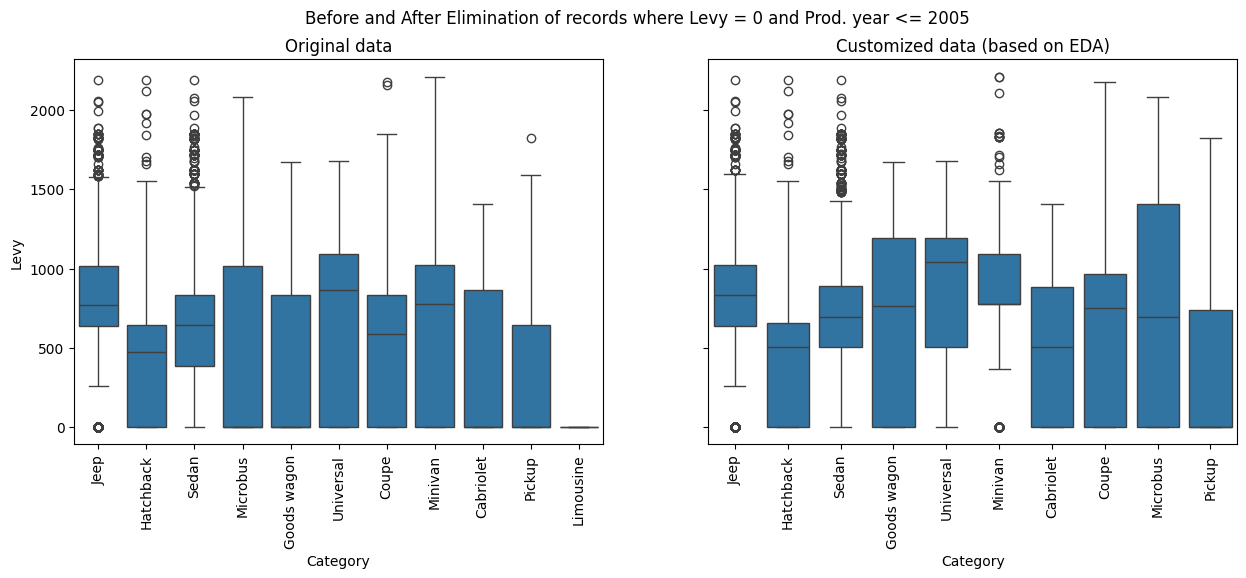

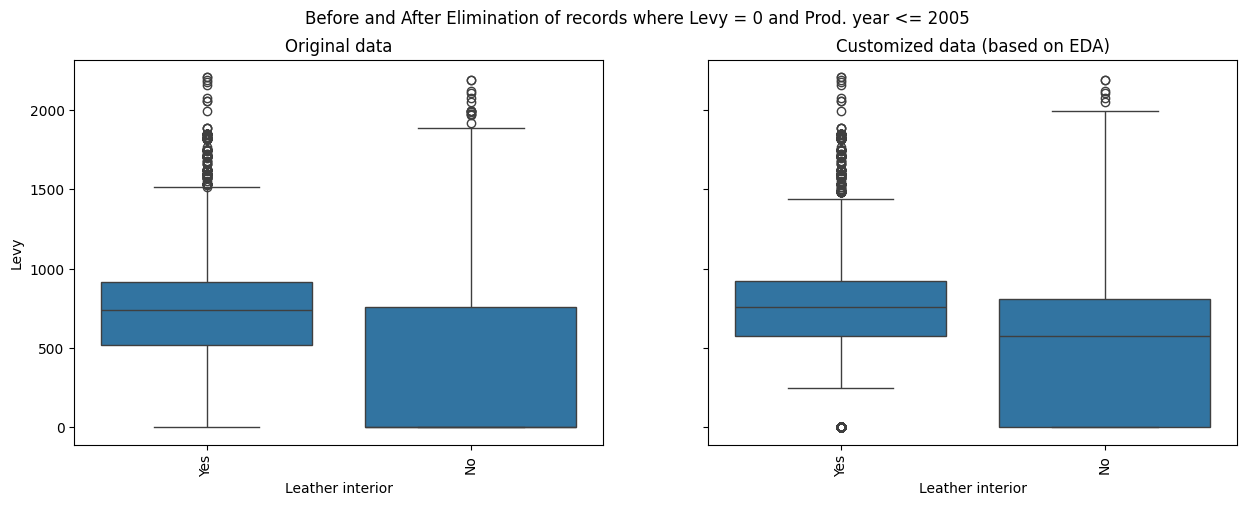

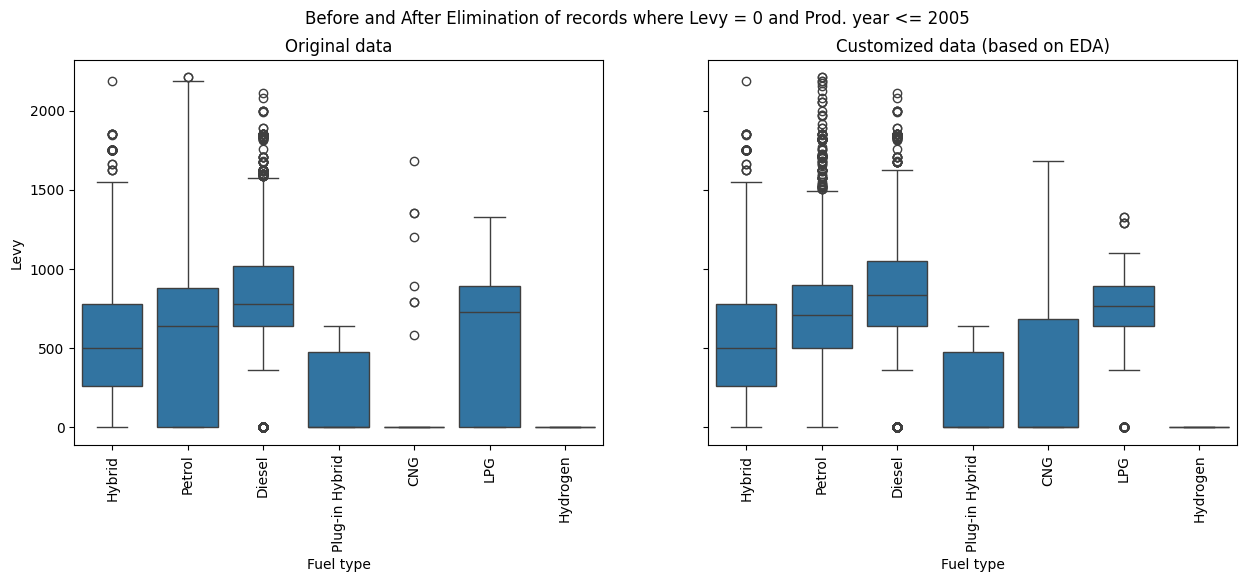

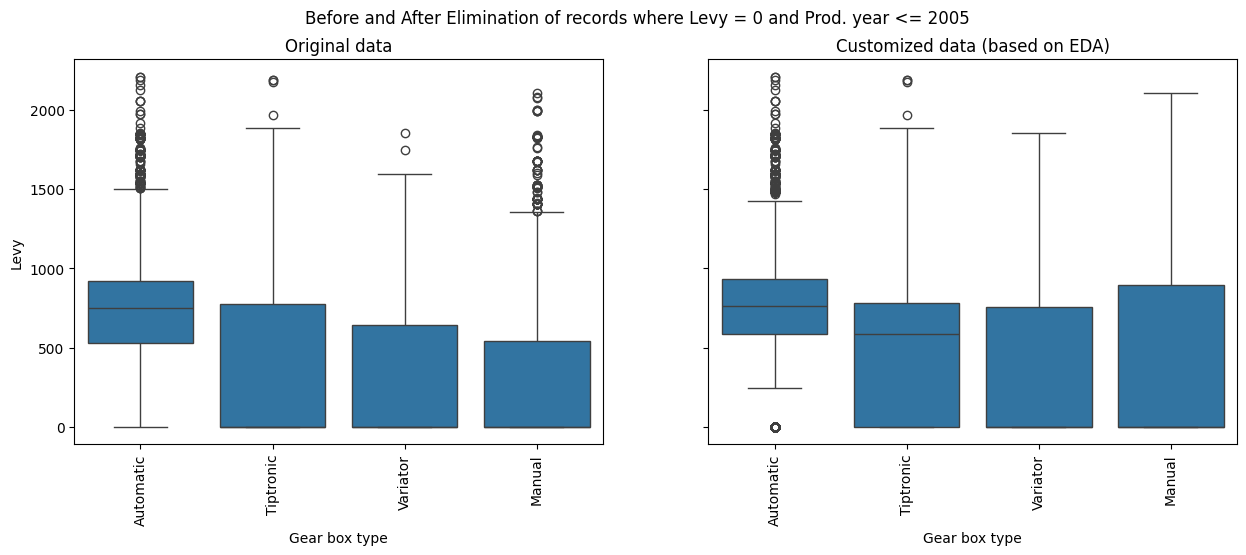

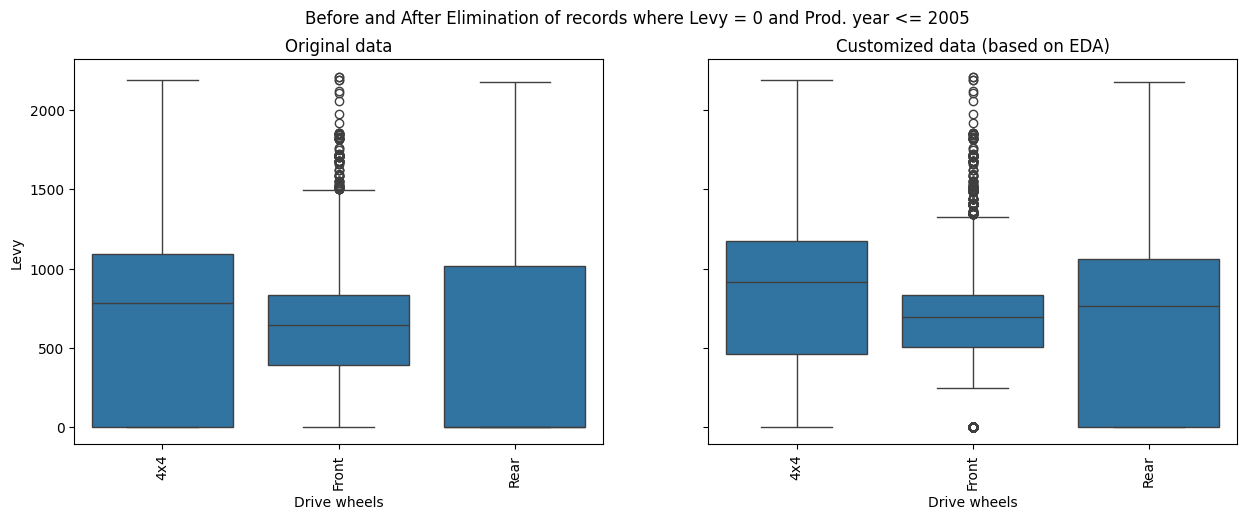

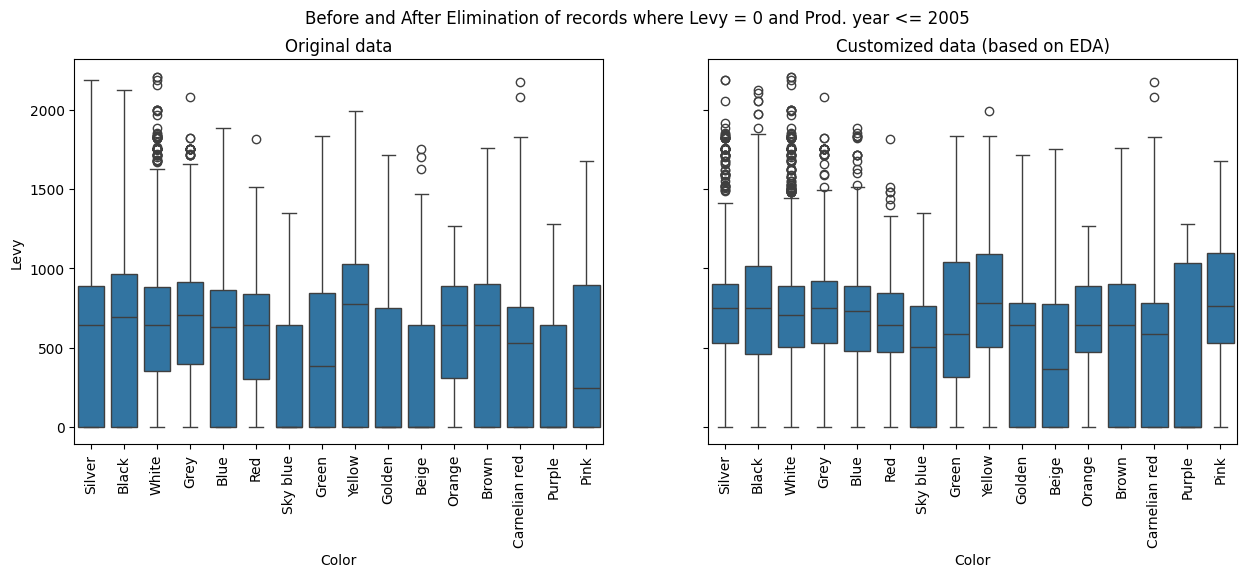

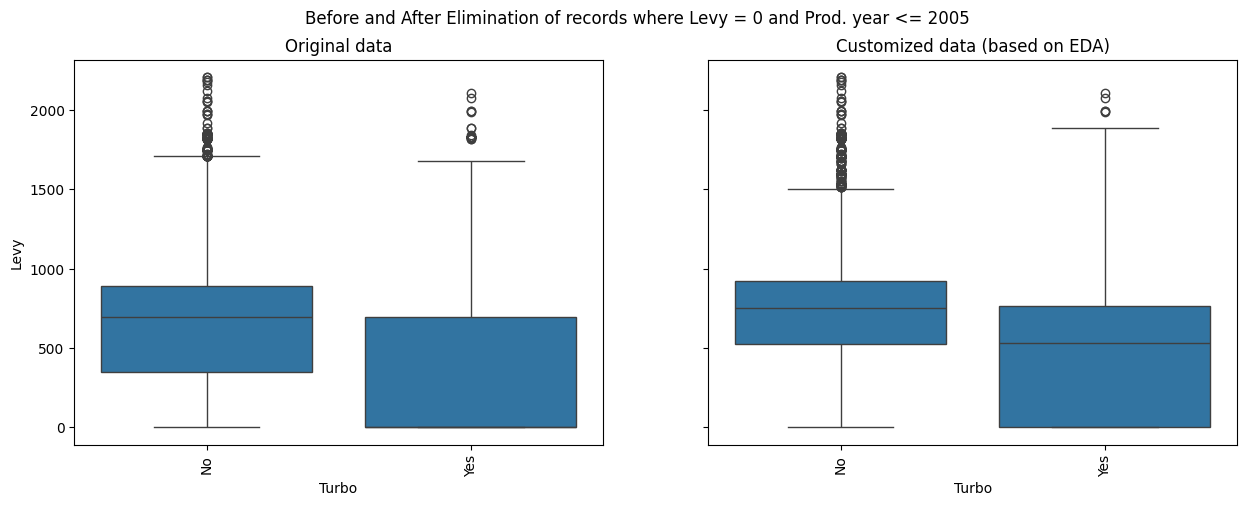

In [51]:
gt_05 = new_df[(new_df['Levy'] > 0 ) | (new_df['Prod. year'] > 2005)]

for i in cat_cols:
    fig, axes = plt.subplots(1,2, figsize=(15,5), sharey='all')
    fig.suptitle('Before and After Elimination of records where Levy = 0 and Prod. year <= 2005')
    sns.boxplot(x=new_df[i], y=new_df['Levy'], ax=axes[0])
    sns.boxplot(x=gt_05[i], y=gt_05['Levy'], ax=axes[1])
    axes[0].set_title('Original data')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
    axes[1].set_title('Customized data (based on EDA)')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
    plt.show()

<hr> <center><p style="font-family: verdona;"><b>EDA insights</b></center>
<p style="font-family: verdona;">
All the categoric features except 'Gear box type' showed clear Levy distinction on the new data making Levy range more specific for each class in each feature which supports our previous analysis.
<p style="font-family: verdona;">
1. The original data shows the Levy range for most of the classes in each category has its Q1 touching the $0 Levy mark while in the new data its not the same, making the Levy more class specific.<br>
2. Even if the Levy Q1 of both the data touch the $0 mark the median differs.

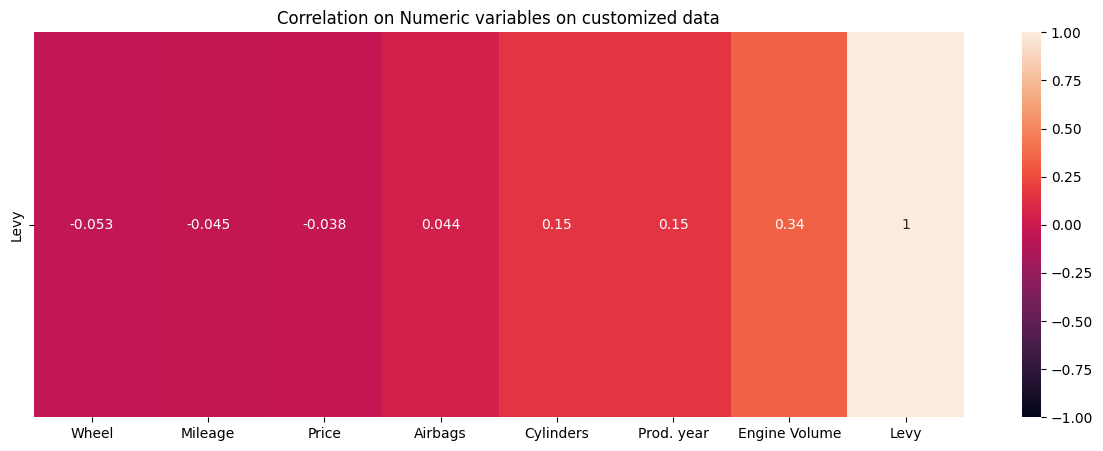

In [52]:
gt_05 = new_df[~((new_df['Levy'] == 0) & (new_df['Prod. year'] <= 2005))]
gt_05_corr = gt_05.select_dtypes(include=['float', 'int']).corr()['Levy']
gt_05_corr_df = pd.DataFrame(gt_05_corr).T
gt_05_corr_df = gt_05_corr_df.sort_values('Levy', axis=1)

plt.figure(figsize=(15,5))
plt.title('Correlation on Numeric variables on customized data')
sns.heatmap(gt_05_corr_df, vmin=-1,vmax=1, annot=True)
plt.show()

In [53]:
# fig, axes = plt.subplots(2, 2, figsize=(15,10), sharey='all')
# sns.boxplot(x=new_df['Cylinders'], y=new_df['Levy'], ax=axes[0, 0])
# sns.boxplot(x=gt_05['Cylinders'], y=gt_05['Levy'], ax=axes[0, 1])
# sns.kdeplot(x=new_df['Engine Volume'], y=new_df['Levy'], ax=axes[1, 0], fill=True,cmap="YlGnBu")
# sns.kdeplot(x=new_df['Engine Volume'], y=new_df['Levy'], ax=axes[1, 0])
# sns.kdeplot(x=gt_05['Engine Volume'], y=gt_05['Levy'], ax=axes[1, 1], fill=True, cmap="YlGnBu")
# sns.kdeplot(x=gt_05['Engine Volume'], y=gt_05['Levy'], ax=axes[1, 1])
# plt.show()

<hr><p style="font-family: verdona;"><b>Observation : </b><br>
The correlation with Cylinders and Engine Volume is increased while decreased for the rest of the features. But it's clearly visible that our analysis supports most of categoric features.

<p style="font-family: verdona;"><b>Conclusion : </b><br>
We will assign the value 1 for the data which either has Levy greater than 0 or Prod. year greater than 2005, and if the Levy is 0 and Prod year is less than 2006 we will assign that record value 0.<hr>

In [54]:
''' Dropped to add this feature as it did not enhance the model accuracy.'''

'''
new_df['Post2005OrLevy'] = np.where((new_df['Levy'] == 0) & (new_df['Prod. year'] <= 2006), 1, 0) 

# because if i put it 0, 1 it will be more likely to have +ve relation with other features which is not the motive of the feature

 new_df['Post2005OrLevy'].value_counts()
'''

"\nnew_df['Post2005OrLevy'] = np.where((new_df['Levy'] == 0) & (new_df['Prod. year'] <= 2006), 1, 0) \n\n# because if i put it 0, 1 it will be more likely to have +ve relation with other features which is not the motive of the feature\n\n new_df['Post2005OrLevy'].value_counts()\n"

<hr> <p style="font-family: verdona;">
Analyzing "Prod. year" feature
<hr>

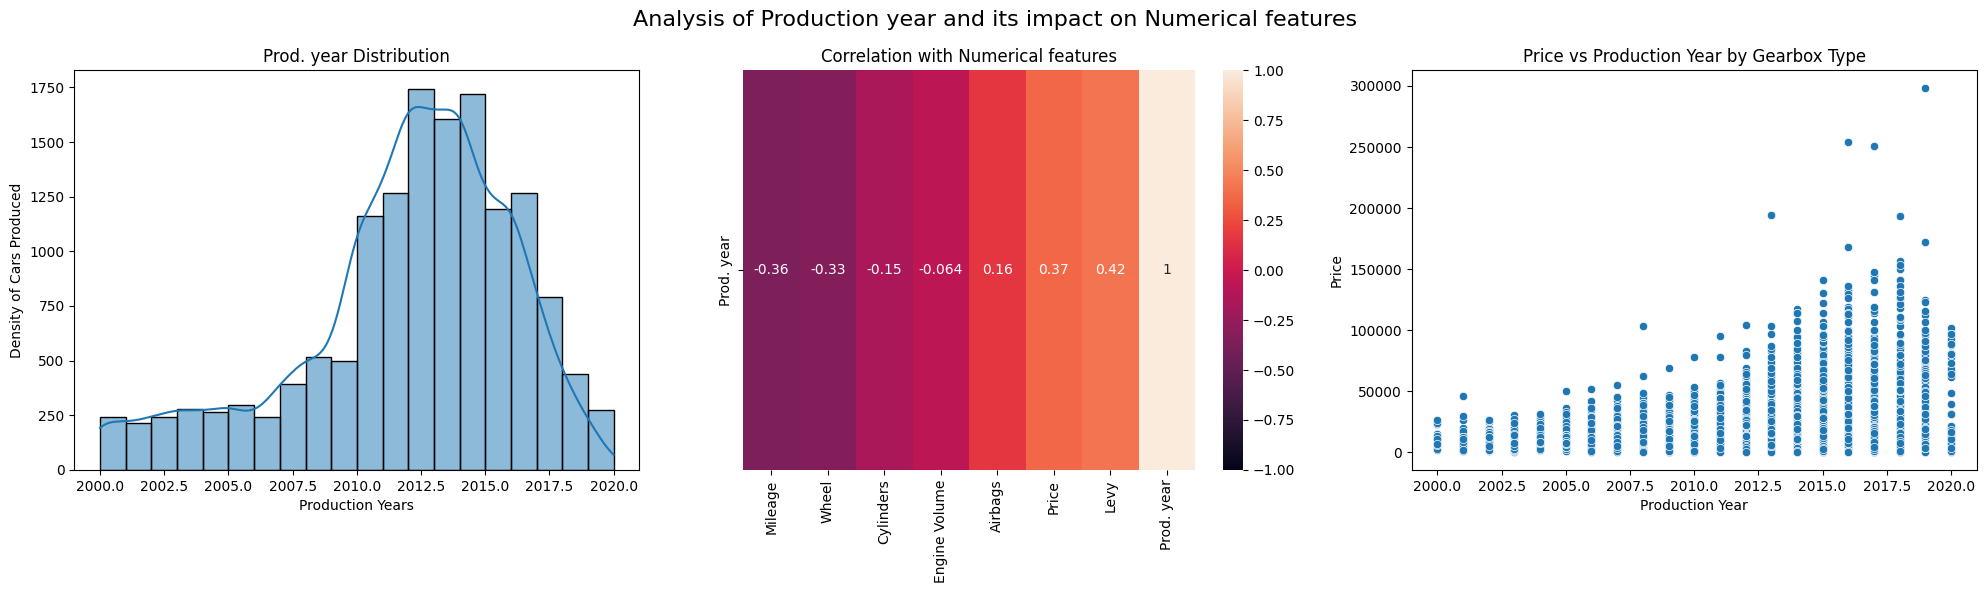

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Analysis of Production year and its impact on Numerical features', fontsize=16)

sns.histplot(new_df['Prod. year'], ax=axes[0], kde=True,
              bins=new_df['Prod. year'].max()-new_df['Prod. year'].min())
axes[0].set_title('Prod. year Distribution')
axes[0].set_ylabel('Density of Cars Produced')
axes[0].set_xlabel('Production Years')

num_cols = new_df.select_dtypes(include=['float', 'int']).columns.tolist()
py_corr_df = pd.DataFrame(new_df[num_cols].corr()['Prod. year']).T
py_corr_df = py_corr_df.sort_values('Prod. year', axis=1)
sns.heatmap(py_corr_df, annot=True, vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Correlation with Numerical features')

sns.scatterplot(x='Prod. year', y='Price', data=new_df, ax=axes[2])
axes[2].set_title('Price vs Production Year by Gearbox Type')
axes[2].set_xlabel('Production Year')
axes[2].set_ylabel('Price')

plt.tight_layout()
plt.show()

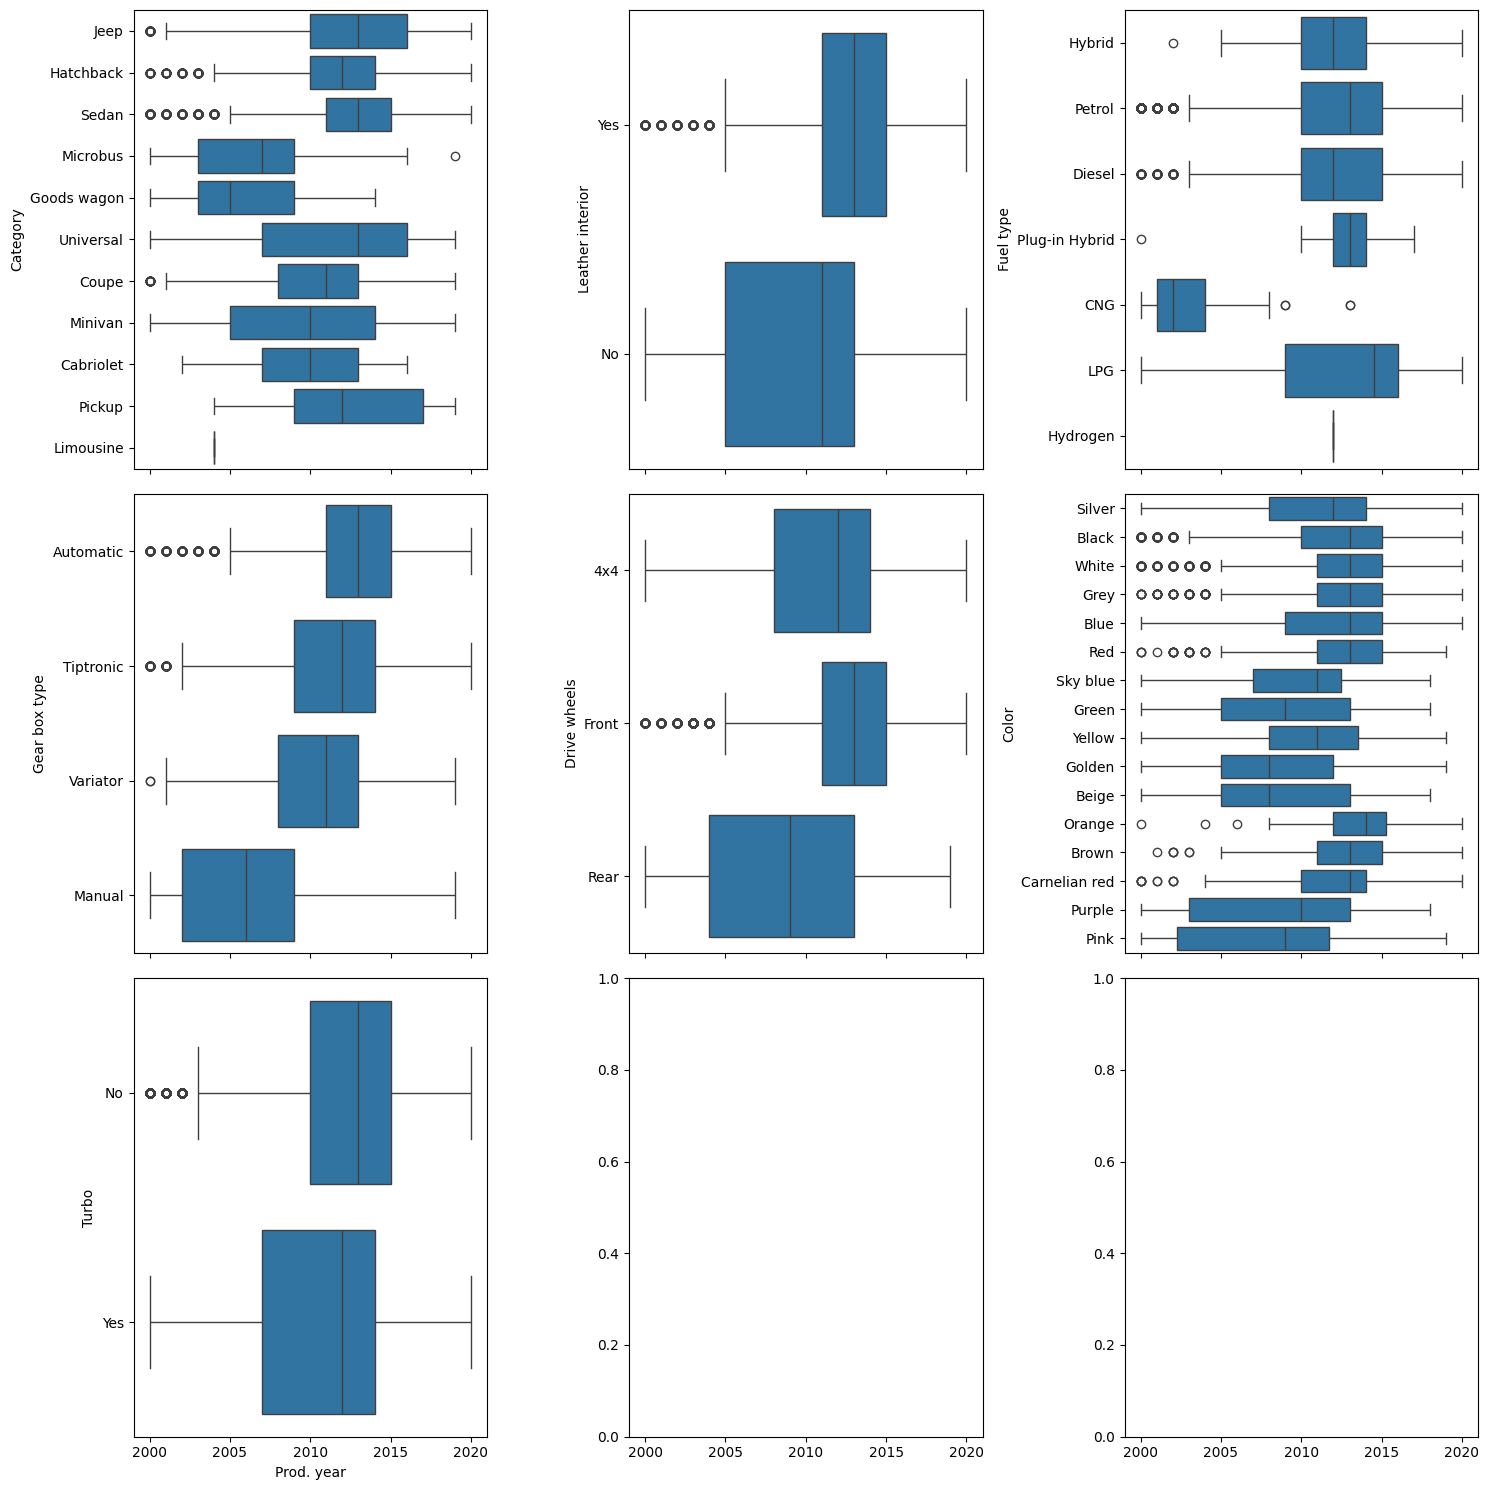

In [56]:
rows = round(len(cat_cols)/3)+1
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*5), sharex='all')

cur_row = 0
for id, val in enumerate(cat_cols) :
    if ((id > 2) and (id%3==0)):
        cur_row+=1
    sns.boxplot(data=new_df, y=val, x='Prod. year', ax=axes[cur_row, id%3])

plt.tight_layout()
plt.show()

<hr> <p style="font-family: verdona;">
Observation : <br>
Gear box type is highly influenced by Production year feature . <br>
Year range - Gear box type (mostly produced) <br>
2000-2009 : Manual  <br>
2008-2012: Variator <br>
2009-2014: Tiptronic <br>
after 2011 : Automatic <br>
<hr>

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Visualizing categorical features

<hr><p style="font-family: verdona;">
Analyzing "Color" variable<br>
organizing value counts in a way they are easy to visualize

<p style="font-family: verdona;">
Domain Knowledge -<br>
The color of a car generally does not significantly impact its price. However, if the color is custom-modified or a special option provided by the manufacturer, it might hold some relevance. Therefore, instead of dropping this feature directly, which could influence the accuracy of our model, we will conduct an analysis to determine if retaining it contributes to effective data cleaning and model performance.<hr>

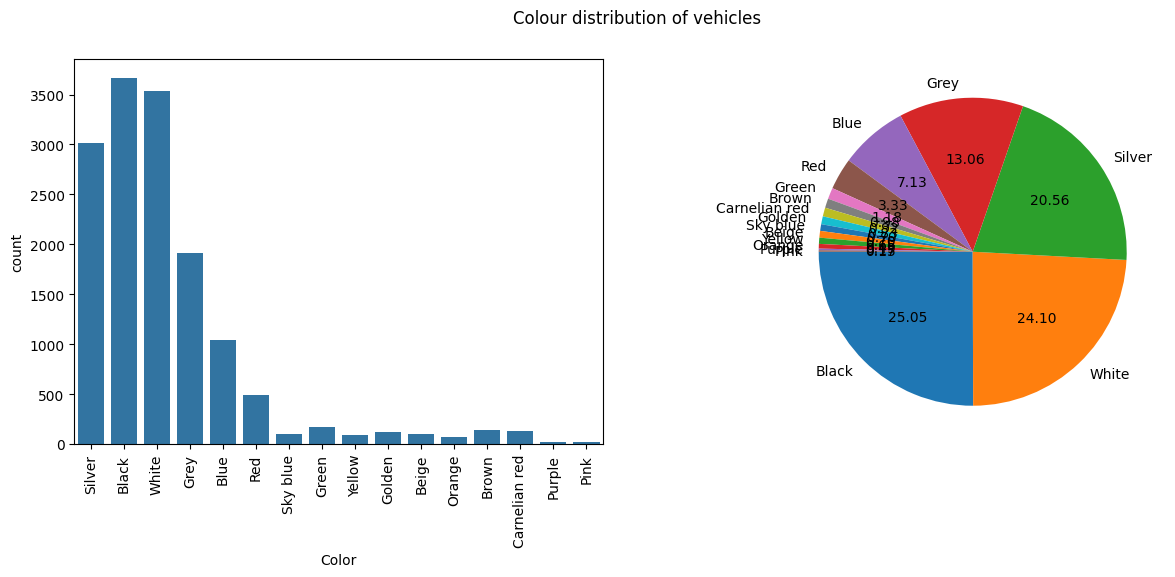

In [57]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x=new_df['Color'], ax=axes[0])
colors_vc = new_df['Color'].value_counts()
fig.suptitle('Colour distribution of vehicles')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].pie(x=colors_vc.values, labels=colors_vc.index, autopct='%.2f',
            startangle=180)
plt.show()

<hr><p style="font-family: verdona;"><b>Observation :</b><br>
The distribution of colours is uneven, few colours share a very small proportion of the distribution.

<p style="font-family: verdona;"><b>Conclusion :</b><br>
We can group the colours sharing less then 1% length of the entire data as Others.<hr>

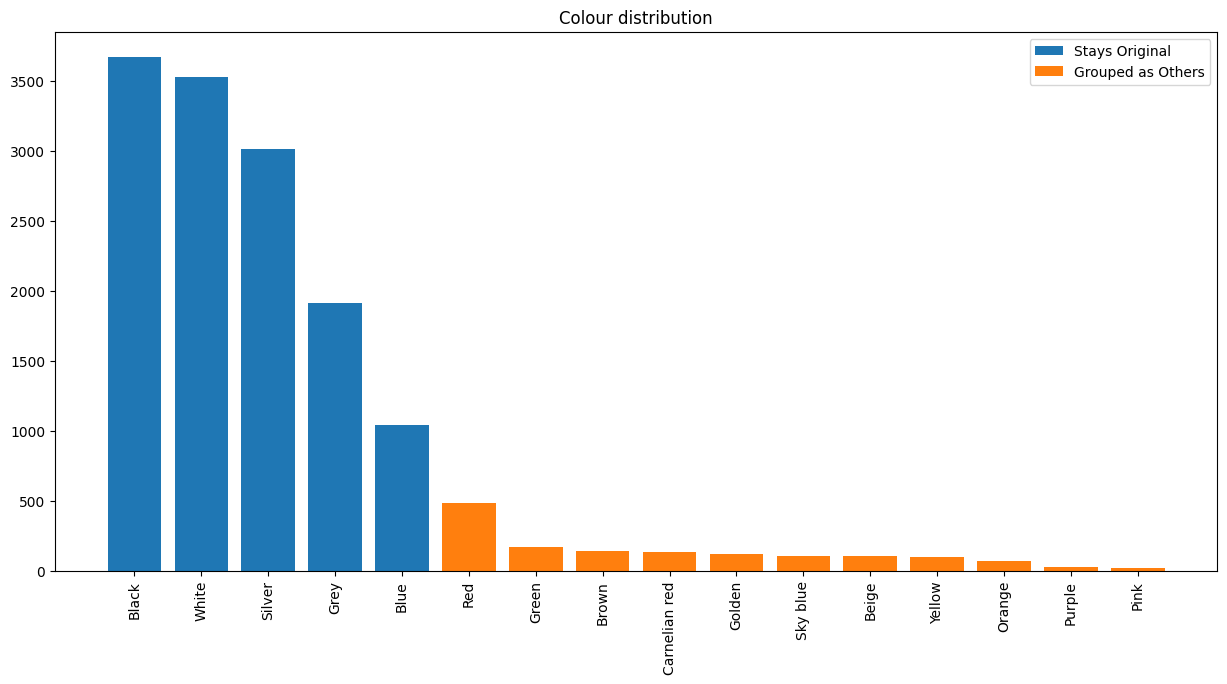

In [58]:
vc =new_df['Color'].value_counts()
min_counts = len(new_df['Color'])/20 #5% of data length
color_vc =  dict()
color_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        color_vc[vc.index[i]] = vc.values[i]
        color_vc_full[vc.index[i]] = 0
    else:
        color_vc[vc.index[i]] = 0
        color_vc_full[vc.index[i]] = vc.values[i]

plt.figure(figsize=(15,7))
plt.bar(range(len(color_vc_full)), list(color_vc_full.values()), align='center')
plt.bar(range(len(color_vc)), list(color_vc.values()), align='center')
plt.xticks(range(len(color_vc)), list(color_vc.keys()),rotation=90)
plt.legend(['Stays Original','Grouped as Others'])
plt.title('Colour distribution')
plt.show()

In [59]:
for key, val in color_vc_full.items():
    if color_vc_full[key] == 0:
        color_vc_full[key] = 'Others'
    else:
        color_vc_full[key] = key

new_df['Color'] = new_df['Color'].map(color_vc_full)
new_df['Color'].unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Others'], dtype=object)

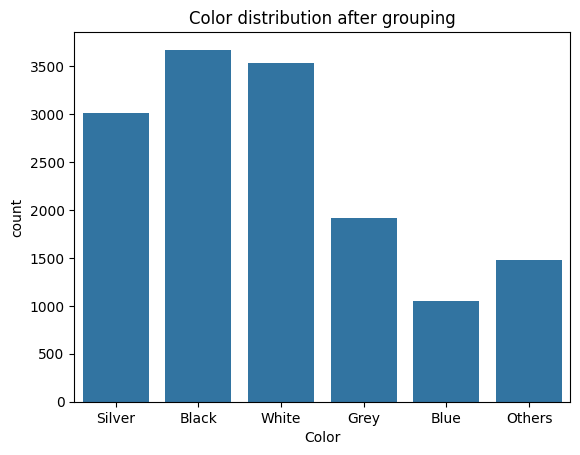

In [60]:
plt.title('Color distribution after grouping')
sns.countplot(x=new_df['Color'])
plt.show()

<hr><p style="font-family: verdona;">
Observation : <br>
1) We cannot see any correlation between Color feature and any other feature, showing any special value range or category associated completely with a color.

<p style="font-family: verdona;">Conclusion :<br>
1) This supports our Domain knowledge and thus considering dropping the Color feature will clean our data and enhance model performance.
<hr>

In [61]:
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">
Analyzing "Fuel type" variable<br>
organizing value counts in a way they are easy to visualize
<hr>

In [62]:
vc =new_df['Fuel type'].value_counts()
fuel_vc =  dict()
for i in range(len(new_df['Fuel type'].value_counts())):
    if len(vc)%2 != 0:
        if i == 0 :
            fuel_vc[vc.index[i]] = vc.values[i]
        elif vc.values[i] == vc.values[-i]:
            fuel_vc[vc.index[i]] = vc.values[i]
            break
        else :
            fuel_vc[vc.index[i]] = vc.values[i]
            fuel_vc[vc.index[-i]] = vc.values[-i]

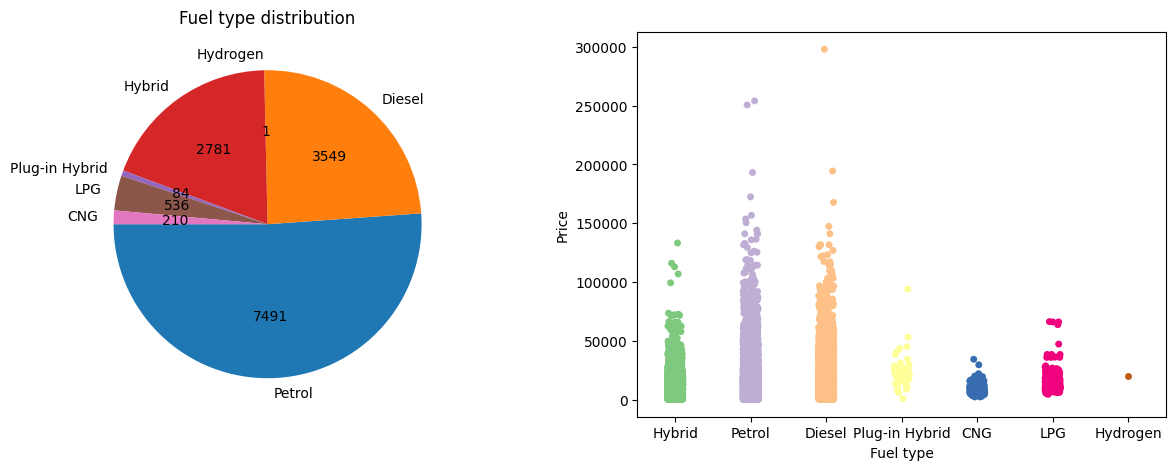

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].pie(x=list(fuel_vc.values()),labels=list(fuel_vc.keys()),autopct=lambda pct: f"{round(pct/100.*sum(fuel_vc.values()))}",startangle=180)
sns.stripplot(x=new_df['Fuel type'], y=new_df['Price'],palette='Accent')
axes[0].set_title('Fuel type distribution')
plt.show()

<hr><p style="font-family: verdona;"><b>Observations:<br></b>
1. Petrol vehicles are by far the most common (9,309 vehicles), Hybrid and Diesel vehicles are the next most common(3,495 and 3,634 respectively), alternative fuel types (CNG, LPG, Plug-in Hybrid, Hydrogen) are much less common.<br>
2. If the Price is above 10k mostly the fuel type's either going to be Petrol or Diesel.

<p style="font-family: verdona;"><b>Conclusion:</b><br>
We can group the fuel types 'Plug-in Hybrid' and 'Hydrogen' (Less than 1% of the total records) into a single category called 'Other' .
<hr>

In [64]:
new_df.replace({'Plug-in Hybrid':'Other', 'Hydrogen': 'Other'}, inplace=True)
new_df['Fuel type'].value_counts()

Fuel type
Petrol    7491
Diesel    3549
Hybrid    2781
LPG        536
CNG        210
Other       85
Name: count, dtype: int64

In [65]:
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">Analyzing "Drive wheels" feature<hr>

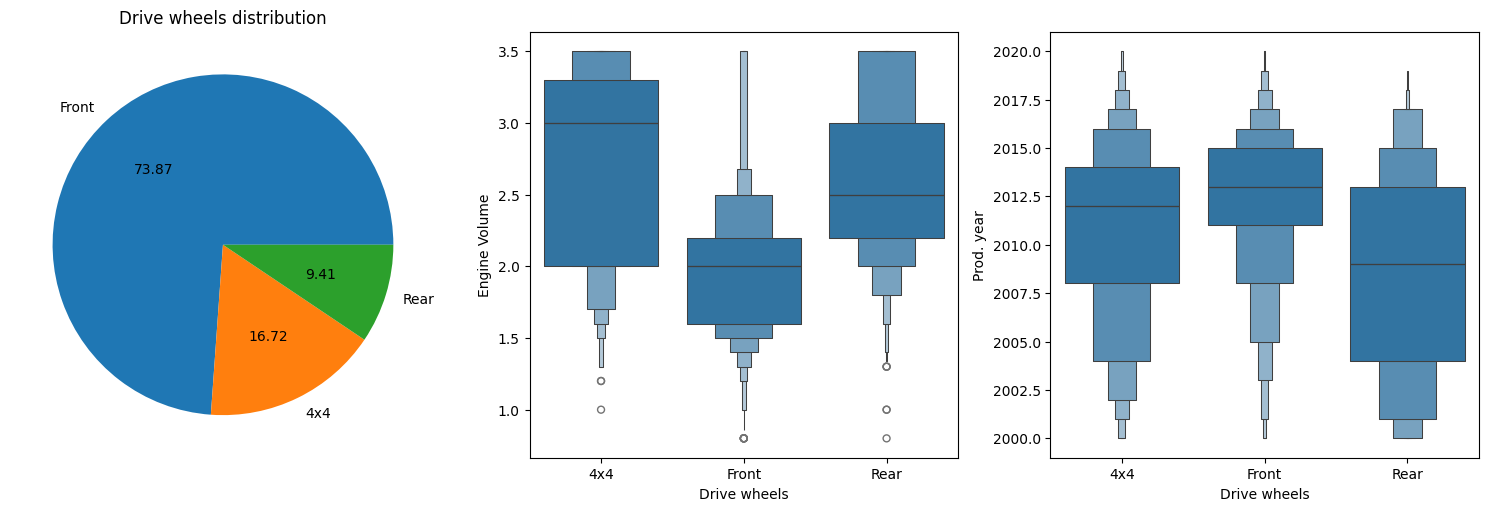

In [66]:
#visualized all graphs but keeping only those that provided insights.
dw_vc = new_df['Drive wheels'].value_counts()
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].pie(x=dw_vc.values, labels=dw_vc.index, autopct='%.2f')
axes[0].set_title('Drive wheels distribution')

sns.boxenplot(data=new_df, x='Drive wheels', y='Engine Volume', ax=axes[1])
sns.boxenplot(data=new_df, x='Drive wheels', y='Prod. year', ax=axes[2])
plt.tight_layout()
plt.show()

<hr><p style="font-family: verdona;"><b>Observation :</b><br>
1. The Drive wheels categories are imbalanced still each category has sufficient  distribution to train the model.<br>
2. Cars having 'Front' Drive wheels tend to have the least Engine volume while '4x4' and 'Rear' ones share the same higher range.<br>
3. Before 2008 mostly cars produced had 'Rear' Drive wheels while cars produced in the years 2009 to 2014 share all three Drive wheels and cars produced after 2014 mostly had 'Front' Drive wheels. <br>

<p style="font-family: verdona;"><b>Conclusion :</b><br>
The Drive wheels features needs to be One hot encoded only, no other changes are required.<hr>

In [67]:
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">Analyzing "Gear box type" feature<hr>

In [68]:
new_df['Gear box type'].describe()

count         14652
unique            4
top       Automatic
freq          10326
Name: Gear box type, dtype: object

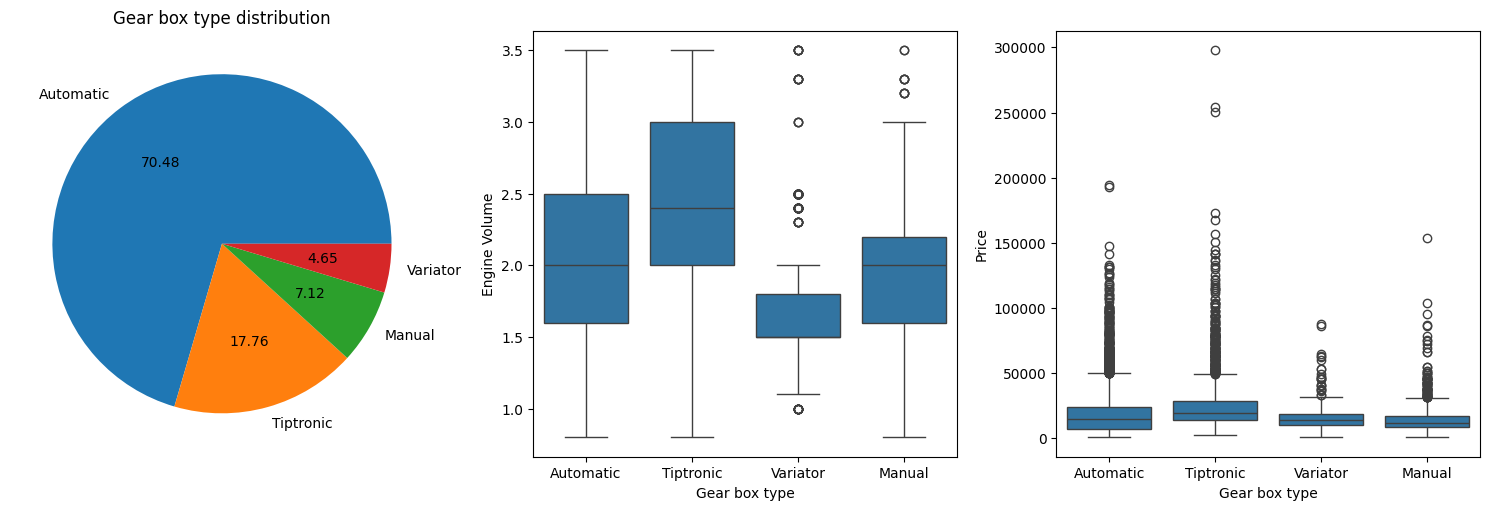

In [69]:
gbt_vc = new_df['Gear box type'].value_counts()
fig, axes = plt.subplots(1,3, figsize=(15, 5))

sns.boxplot(data=new_df, x='Gear box type', y='Engine Volume', ax=axes[1])
sns.boxplot(data=new_df, x='Gear box type', y='Price', ax=axes[2])
axes[0].pie(labels=gbt_vc.index, x=gbt_vc.values, autopct='%.2f')
axes[0].set_title('Gear box type distribution')
plt.tight_layout()
plt.show() 

<hr><p style="font-family: verdona;"><b>Observation : </b><br>
1. The data shows an imbalance, with the 'Automatic' gearbox type being the most prevalent. However, each gearbox type still has a substantial representation.<br>
2. Vehicles with a 'Tiptronic' gearbox tend to have larger engine volumes than those with other gear types, contributing to their placement in a higher price range, as illustrated in Graph 3.<br>
3. Another factor behind the higher price range could be that both 'Tiptronic' and 'Automatic' cars were manufactured more recently, as seen in earlier diagrams.

<p style="font-family: verdona;"><b>Conclusion :</b><br>
There is no need of doing other changes than one hot encoding<hr>

In [70]:
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">Analyzing "Prod. Year" feature <hr>

In [71]:
a = list(new_df['Prod. year'])
a.sort()
print('most old : ', a[0], ' most recent : ',a[-1])

most old :  2000  most recent :  2020


In [72]:
def bucket_years(val):
    if val in range(1900,1950):
        return 0
    elif val in range(1951,1960):
        return 1
    elif val in range(1961,1970):
        return 2
    elif val in range(1971,1980):
        return 3
    elif val in range(1981,1990):
        return 4
    elif val in range(1991,2000):
        return 5
    elif val in range(2001,2010):
        return 6
    else : 
        return 7
    
def calc_age(year):
    age = 2024 - year
    return age

<hr><p style="font-family: verdona;"><b>
Experimentation :</b><br><br>
Intially I used buckets to group each decade as one group . <br>
1940-1950 : 0, 1951-1960 : 1, 1961-1970 : 2, 1971-1980 : 3, <br>
1981-1990 : 4, 1991-2000 : 5, 2001-2010 : 6, 2011-2020 : 7<br><br>
Later changed it to calculating Age as it enchanced model accuracy drastically. <br>
<hr>

In [73]:
new_df['Car_Age'] = new_df['Prod. year'].apply(calc_age)
new_df.drop(columns=['Prod. year'], inplace=True)
new_df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume,Car_Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3,10


<hr><p style="font-family: verdona;">Analyzing "Category" variable<hr>

In [74]:
new_df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Pickup',
       'Limousine'], dtype=object)

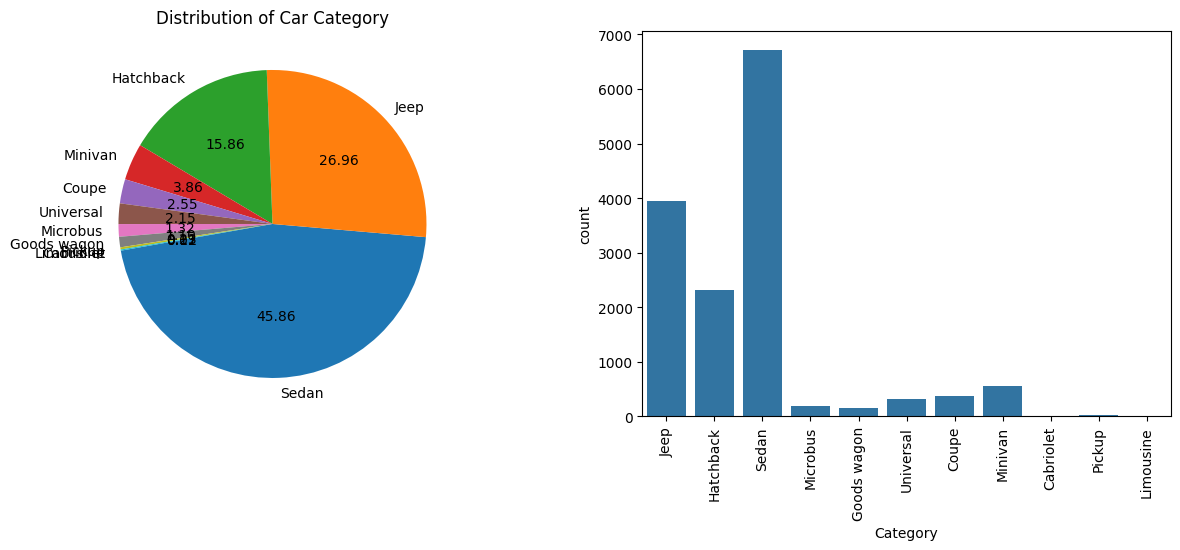

In [75]:
cat_vc = new_df['Category'].value_counts()
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_title('Distribution of Car Category')
axes[0].pie(x=cat_vc.values, labels=cat_vc.index, autopct='%.2f', startangle=190)
sns.countplot(x=new_df['Category'], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.show()

<hr><p style="font-family: verdona;"><b>Observation :</b><br>
There exists some categories of cars which have very less share in the distribution including Pickup,Cabriolet and Limousine.

<p style="font-family: verdona;"><b>Conclusion :</b><br>
We will have to group the categories with less than 2%(based on visualization) records as Others because the model will make poor predictions on this data.<hr>

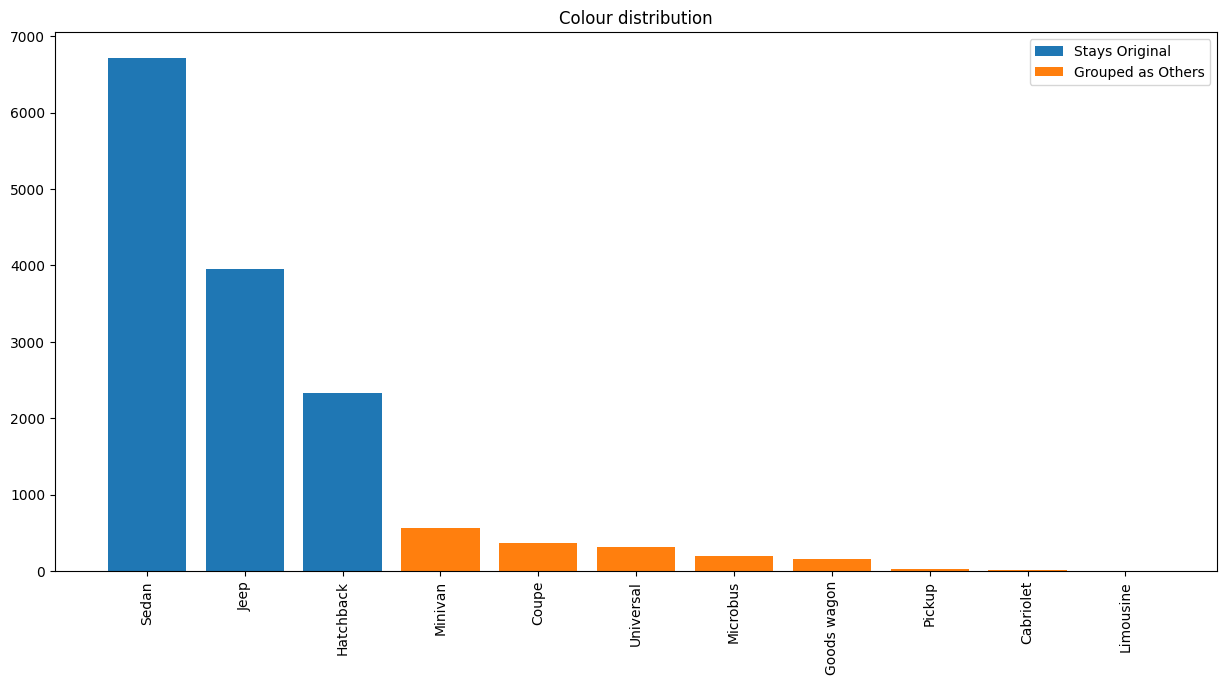

In [76]:
vc =new_df['Category'].value_counts()
min_counts = len(new_df['Category'])/20 #2% of data length
cat_vc =  dict()
cat_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        cat_vc[vc.index[i]] = vc.values[i]
        cat_vc_full[vc.index[i]] = 0
    else:
        cat_vc[vc.index[i]] = 0
        cat_vc_full[vc.index[i]] = vc.values[i]

plt.figure(figsize=(15,7))
plt.bar(range(len(cat_vc_full)), list(cat_vc_full.values()), align='center')
plt.bar(range(len(cat_vc)), list(cat_vc.values()), align='center')
plt.xticks(range(len(cat_vc)), list(cat_vc.keys()),rotation=90)
plt.legend(['Stays Original','Grouped as Others'])
plt.title('Colour distribution')
plt.show()

In [77]:
for key, val in cat_vc_full.items():
    if cat_vc_full[key] == 0:
        cat_vc_full[key] = 'Others'
    else:
        cat_vc_full[key] = key

new_df['Category'] = new_df['Category'].map(cat_vc_full)
new_df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Others'], dtype=object)

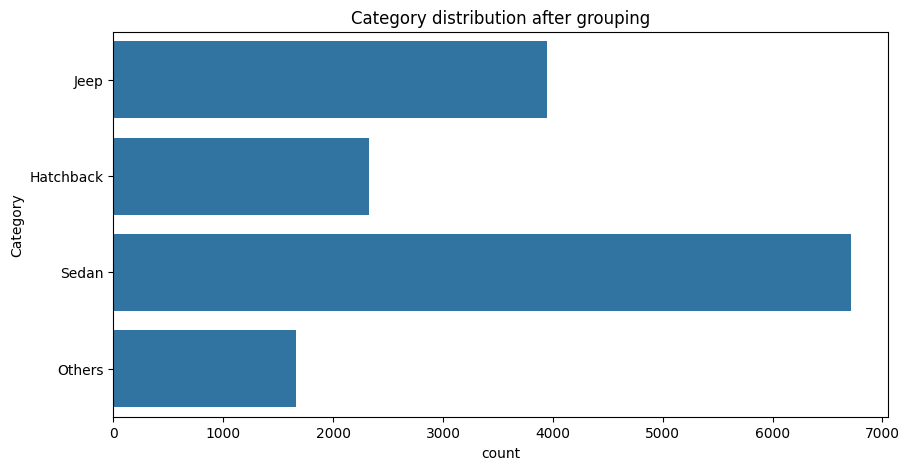

In [78]:
plt.figure(figsize=(10,5))
plt.title('Category distribution after grouping')
sns.countplot(y=new_df['Category'])
plt.show()

In [79]:
new_df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume,Car_Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3,10


<hr><p style="font-family: verdona;">Analyzing "Manufacturer" & "Model" features together<hr>

In [80]:
new_df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'PORSCHE', 'JEEP', 'VOLKSWAGEN', 'AUDI',
       'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'BMW', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'OPEL', 'CITROEN', 'MINI', 'DODGE',
       'JAGUAR', 'ISUZU', 'ACURA', 'VAZ', 'SKODA', 'LAND ROVER',
       'CHRYSLER', 'LINCOLN', 'BUICK', 'DAIHATSU', 'PEUGEOT', 'VOLVO',
       'სხვა', 'HAVAL', 'CADILLAC', 'SCION', 'MERCURY', 'SEAT', 'LANCIA',
       'MASERATI', 'SAAB', 'GAZ', 'UAZ', 'HUMMER', 'PONTIAC', 'SATURN',
       'GREATWALL'], dtype=object)

<hr><p style="font-family: verdona;">სხვა means Other in Georgian<hr>

In [81]:
def lowercase(row_val):
    return row_val.lower().strip()

In [82]:
new_df['Manufacturer'] = new_df['Manufacturer'].replace('სხვა','OTHER')
new_df['Manufacturer'] = new_df['Manufacturer'].apply(lowercase)
new_df['Manufacturer'].unique()

array(['lexus', 'chevrolet', 'honda', 'ford', 'hyundai', 'toyota',
       'mercedes-benz', 'porsche', 'jeep', 'volkswagen', 'audi',
       'renault', 'nissan', 'subaru', 'daewoo', 'bmw', 'kia',
       'mitsubishi', 'ssangyong', 'mazda', 'gmc', 'fiat', 'infiniti',
       'alfa romeo', 'suzuki', 'opel', 'citroen', 'mini', 'dodge',
       'jaguar', 'isuzu', 'acura', 'vaz', 'skoda', 'land rover',
       'chrysler', 'lincoln', 'buick', 'daihatsu', 'peugeot', 'volvo',
       'other', 'haval', 'cadillac', 'scion', 'mercury', 'seat', 'lancia',
       'maserati', 'saab', 'gaz', 'uaz', 'hummer', 'pontiac', 'saturn',
       'greatwall'], dtype=object)

In [83]:
print('Total Unique Manufacturers : ', len(new_df['Manufacturer'].unique()))

Total Unique Manufacturers :  56


In [84]:
print('(Before Cleaning) Total Unique Models : ', len(new_df['Model'].unique()))

(Before Cleaning) Total Unique Models :  1251


In [85]:
for model in list(new_df['Manufacturer'].unique()):
    print(list(new_df[new_df['Manufacturer'] == model]['Model'].unique()))

['RX 450', 'RX 350', 'NX 300', 'CT 200h', 'GS 350', 'RX 400', 'NX 200', 'RX 300', 'RX 400 HYBRID', 'HS 250h Hybrid', 'ES 350', 'IS 200', 'ES 300', 'IS 250', 'IS 350', 'HS 250h', 'CT 200h F-sport', 'RX 350 F sport', 'RX 450 H', 'CT 200h F SPORT', 'RC F', 'IS 250 რესტაილინგი', 'RX 400 RESTAILING', 'IS 300', 'GS 300', 'IS 250 TURBO', 'GS 450', 'RX 450 HYBRID', 'RC F F SPORT', 'ES 300 hybrid', 'IS 350 C', 'CT 200h 1.8', 'RX 400 hybrid', 'CT 200h F sport', 'RX 400 H', 'RX 450 F SPORT']
['Equinox', 'Cruze LT', 'Captiva', 'Cruze', 'Orlando', 'Volt', 'Malibu', 'Lacetti', 'Aveo', 'Matiz', 'Spark', 'Impala', 'Cruze ltz', 'Cruze LTZ', 'Cruze strocna', 'Volt premier', 'Cruze Premier', '1500', 'Equinox LT', 'Cruze RS', 'Sonic', 'Cruze LS', 'Cruze sonic', 'Nubira', 'Cruze L T', 'Malibu LT', 'Malibu eco', 'HHR', 'Cruze Cruze', 'Malibu Hybrid', 'Trax', 'Volt Full Packet', 'Volt PREMIER', 'Sonic LT', 'Corvette', 'Cruze PREMIER', 'Camaro', 'Niva', 'Volt Premier', 'Cruze LT RS', 'Kalos', 'Cruze S']
['FIT

<hr><p style="font-family: verdona;"><b>Observation : </b><br>
1. Here we can see multiple presence of the same model in different cases(upper-lower) which is making a single model as two different models .<br>
2. Also we can see that the base model variants are containing the precise model name along with its fuel type, turbo availability, engine vol, etc. 

<p style="font-family: verdona;"><b>Conclusion :</b><br>
1. To eliminate same model name occurance in different cases we will lowercase and strip all the model names so we can eliminate duplication of models due to case sensitivity.<br>
2. We will have to take a deep look into the model names for each manufacturer to capture the format of extracting the base models and group its variants like limited edition  . <hr>

In [86]:
new_df['Model'] = new_df['Model'].apply(lowercase)

In [87]:
for id, manufacturer in enumerate(list(new_df['Manufacturer'].unique())):
    models = list(new_df[new_df['Manufacturer'] == manufacturer]['Model'].unique())
    base_models = list()
    if manufacturer == 'lexus':
        for model in models:
            base_models.append(model[:6])
    elif manufacturer == 'mercedes-benz':
        for model in models:
            l1 = list()
            for char in model:
                if char.isdigit():
                    l1.append(char)
                    if len(l1) == 3:
                        break
            splitter = str()
            for element in l1 :
                splitter= splitter + str(element)

            if len(l1) == 3 :
                bm = model.split(splitter)[0] + splitter
            else : 
                bm = model.split(' ')[0]
            base_models.append(bm)
    elif manufacturer == 'fiat':
        for model in models :
            if '500' in model:
                bm = '500'
            else :
                bm = model.split(' ')[0]
            base_models.append(bm)
    else :
        for model in models:
            base_models.append(model.split(' ')[0])

    print('Manufacturer : ', manufacturer, '\n Models - ', models,
          '\n Base models - ', base_models)

    models_map = dict()
    for i,j in zip(models, base_models):
        models_map[i] = j

    # Used this initialy for verification and integrating modifications accordingly in the conditional statements
    # user = input('Verify : y(approve and continue) n(break)')
    # if user == 'y':
    #     pass
    # else :
    #     break

    new_df['Model'] = new_df['Model'].replace(models_map)

Manufacturer :  lexus 
 Models -  ['rx 450', 'rx 350', 'nx 300', 'ct 200h', 'gs 350', 'rx 400', 'nx 200', 'rx 300', 'rx 400 hybrid', 'hs 250h hybrid', 'es 350', 'is 200', 'es 300', 'is 250', 'is 350', 'hs 250h', 'ct 200h f-sport', 'rx 350 f sport', 'rx 450 h', 'ct 200h f sport', 'rc f', 'is 250 რესტაილინგი', 'rx 400 restailing', 'is 300', 'gs 300', 'is 250 turbo', 'gs 450', 'rx 450 hybrid', 'rc f f sport', 'es 300 hybrid', 'is 350 c', 'ct 200h 1.8', 'rx 400 h', 'rx 450 f sport'] 
 Base models -  ['rx 450', 'rx 350', 'nx 300', 'ct 200', 'gs 350', 'rx 400', 'nx 200', 'rx 300', 'rx 400', 'hs 250', 'es 350', 'is 200', 'es 300', 'is 250', 'is 350', 'hs 250', 'ct 200', 'rx 350', 'rx 450', 'ct 200', 'rc f', 'is 250', 'rx 400', 'is 300', 'gs 300', 'is 250', 'gs 450', 'rx 450', 'rc f f', 'es 300', 'is 350', 'ct 200', 'rx 400', 'rx 450']
Manufacturer :  chevrolet 
 Models -  ['equinox', 'cruze lt', 'captiva', 'cruze', 'orlando', 'volt', 'malibu', 'lacetti', 'aveo', 'matiz', 'spark', 'impala', 'c

In [88]:
print('Total unique models : ', len(new_df['Model'].unique()))

Total unique models :  555


<hr><p style="font-family: verdona;">We can see here we have significantly reduced the number of unique models which will prove beneficial as the prices of the variant model wont have much difference and each variant model wont have many records to be able to strengthen the prediction accuracy of the model.<br><br> 
Also the names of the model wont be a differenciator among prices the other features would be for example a limited edition model might have a higher engine volume so the model know the car's price is high because it has a higher engine volume and not because of the name of the model .<hr>

In [89]:
new_df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume,Car_Age
0,13328,1399,lexus,rx 450,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5,14
1,16621,1018,chevrolet,equinox,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0,13
2,8467,0,honda,fit,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3,18
3,3607,862,ford,escape,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5,13
4,11726,446,honda,fit,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3,10


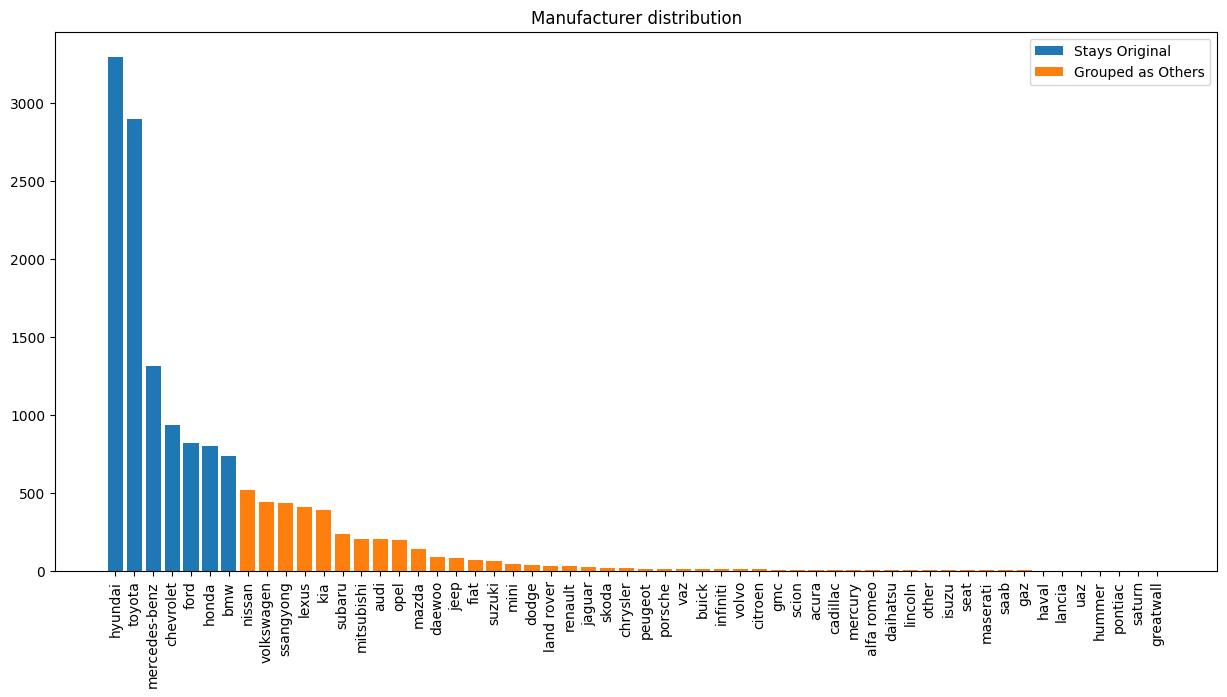

In [90]:
vc =new_df['Manufacturer'].value_counts()
min_counts = len(new_df['Manufacturer'])/20 #5% of data length
man_vc =  dict()
man_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        man_vc[vc.index[i]] = vc.values[i]
        man_vc_full[vc.index[i]] = 0
    else:
        man_vc[vc.index[i]] = 0
        man_vc_full[vc.index[i]] = vc.values[i]

plt.figure(figsize=(15,7))
plt.bar(range(len(man_vc_full)), list(man_vc_full.values()), align='center')
plt.bar(range(len(man_vc)), list(man_vc.values()), align='center')
plt.xticks(range(len(man_vc)), list(man_vc.keys()),rotation=90)
plt.legend(['Stays Original','Grouped as Others'])
plt.title('Manufacturer distribution')
plt.show()

In [91]:
man_vc = new_df['Manufacturer'].value_counts()
limit = len(new_df)//20 # 5% length of data
others = list()
total = 0
for i, j in zip(man_vc.values, man_vc.index):
    if i <= limit:
        print(i,j)
        others.append(j)
        total = total + i
print(total)

519 nissan
444 volkswagen
437 ssangyong
410 lexus
391 kia
237 subaru
207 mitsubishi
205 audi
200 opel
137 mazda
91 daewoo
82 jeep
68 fiat
62 suzuki
45 mini
39 dodge
32 land rover
30 renault
27 jaguar
18 skoda
16 chrysler
14 peugeot
14 porsche
13 vaz
12 buick
12 infiniti
12 volvo
9 citroen
8 gmc
7 scion
7 acura
6 cadillac
4 mercury
4 alfa romeo
4 daihatsu
4 lincoln
2 other
2 isuzu
2 seat
2 maserati
2 saab
2 gaz
1 haval
1 lancia
1 uaz
1 hummer
1 pontiac
1 saturn
1 greatwall
3846


<hr><p style="font-family: verdona;">
 If there are less records for a manufacturer then by default their respective models will also be less, such that the model will not be able to predict the prices accurately. So we will have to group them as others in Manufacturer as well as Model feature.
<p style="font-family: verdona;">
 Also this will generalize the model predictions and not overfit according to the data.<hr>

In [92]:
def group_man(value):
    if value in others:
        return 'other'
    else :
        return value

In [93]:
new_df['Manufacturer'] =  new_df['Manufacturer'].apply(group_man)
print('Total uniques after grouping : ', new_df['Manufacturer'].unique())
new_df[new_df['Manufacturer'] == 'other']

Total uniques after grouping :  ['other' 'chevrolet' 'honda' 'ford' 'hyundai' 'toyota' 'mercedes-benz'
 'bmw']


,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume,Car_Age
0,13328,1399,other,rx 450,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5,14
8,26657,0,other,rx 350,Jeep,Yes,Petrol,128500,6.0,Automatic,4x4,0,Silver,12,No,3.5,17
10,1019,1055,other,rx 450,Jeep,Yes,Hybrid,138038,6.0,Automatic,Front,0,White,12,No,3.5,11
22,19444,915,other,cayenne,Jeep,Yes,Diesel,175056,6.0,Automatic,4x4,0,White,12,No,3.0,10
23,24462,0,other,grand,Jeep,Yes,Diesel,250000,6.0,Tiptronic,4x4,0,Black,10,Yes,3.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14641,15681,0,other,jetta,Sedan,Yes,Petrol,81200,5.0,Manual,Front,0,Silver,12,No,2.5,11
14642,8781,0,other,caliber,Hatchback,No,Petrol,0,4.0,Automatic,Front,0,Blue,4,No,2.4,16
14643,19130,0,other,optima,Sedan,Yes,Petrol,35800,4.0,Automatic,Front,0,Black,12,No,2.4,10
14644,8781,1107,other,combo,Others,No,Diesel,236000,4.0,Manual,Front,0,Others,4,Yes,1.7,17


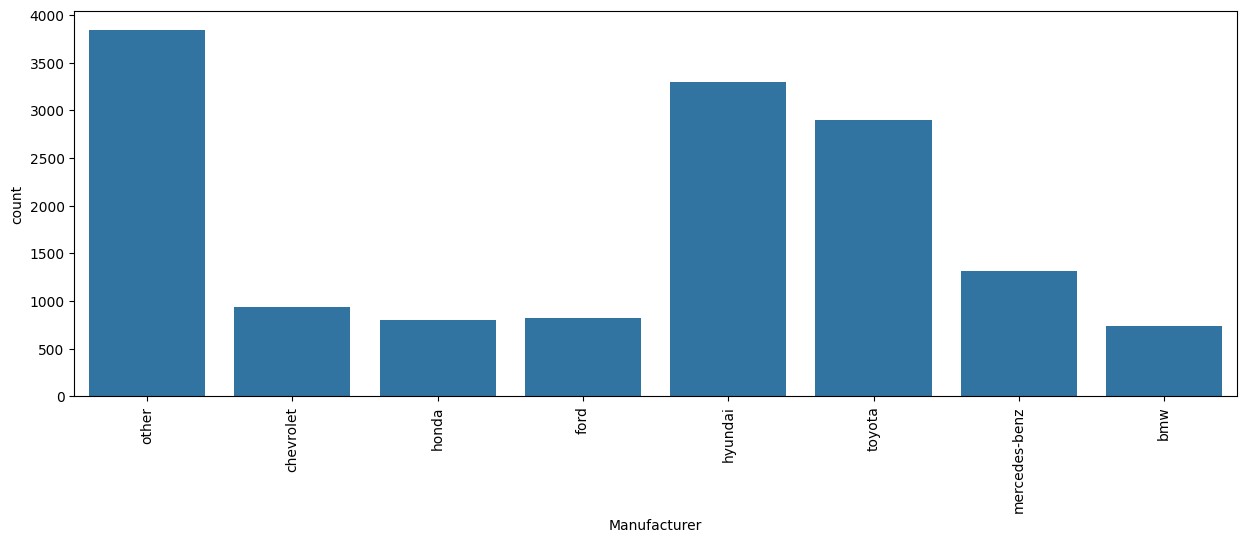

In [94]:
plt.figure(figsize=(15,5))
sns.countplot(x=new_df['Manufacturer'])
plt.xticks(rotation=90)
plt.show()

In [95]:
new_df['Model'] = np.where(new_df['Manufacturer'] == 'other', 'other', new_df['Model'])
new_df[new_df['Model']=='other']

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume,Car_Age
0,13328,1399,other,other,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5,14
8,26657,0,other,other,Jeep,Yes,Petrol,128500,6.0,Automatic,4x4,0,Silver,12,No,3.5,17
10,1019,1055,other,other,Jeep,Yes,Hybrid,138038,6.0,Automatic,Front,0,White,12,No,3.5,11
22,19444,915,other,other,Jeep,Yes,Diesel,175056,6.0,Automatic,4x4,0,White,12,No,3.0,10
23,24462,0,other,other,Jeep,Yes,Diesel,250000,6.0,Tiptronic,4x4,0,Black,10,Yes,3.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14641,15681,0,other,other,Sedan,Yes,Petrol,81200,5.0,Manual,Front,0,Silver,12,No,2.5,11
14642,8781,0,other,other,Hatchback,No,Petrol,0,4.0,Automatic,Front,0,Blue,4,No,2.4,16
14643,19130,0,other,other,Sedan,Yes,Petrol,35800,4.0,Automatic,Front,0,Black,12,No,2.4,10
14644,8781,1107,other,other,Others,No,Diesel,236000,4.0,Manual,Front,0,Others,4,Yes,1.7,17


In [96]:
new_df['Model'].value_counts()

Model
other       3846
prius       1009
elantra      904
camry        828
sonata       749
            ... 
matrix         1
5.30e+62       1
130            1
s 400          1
slk 350        1
Name: count, Length: 267, dtype: int64

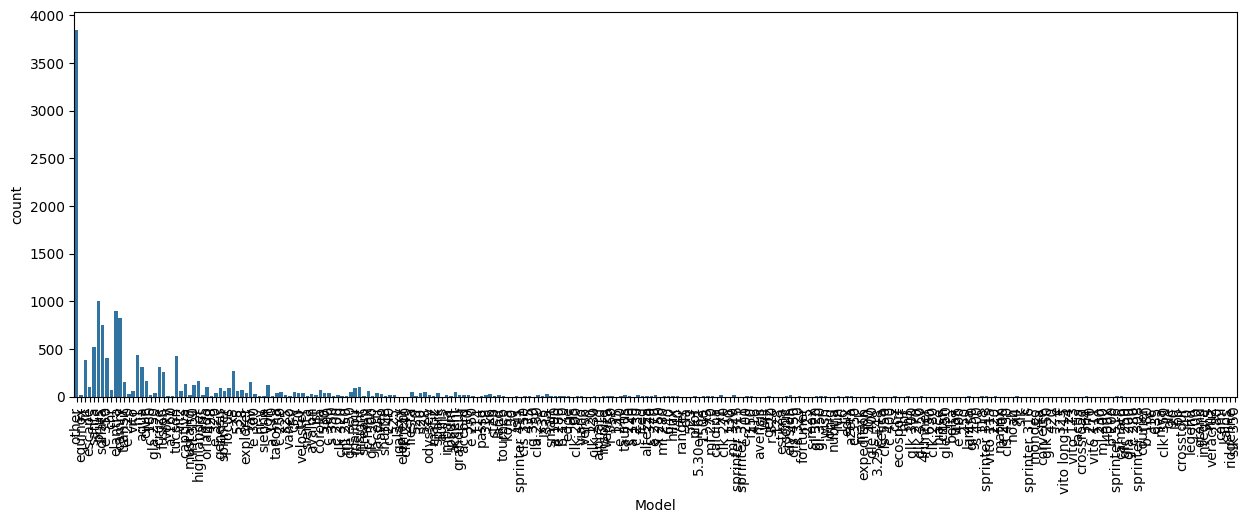

In [97]:
plt.figure(figsize=(15,5))
sns.countplot(x=new_df['Model'])
plt.xticks(rotation=90)
plt.show()

<hr><p style="font-family: verdona;">We will need to do the same thing for model feature i.e. grouping<hr>

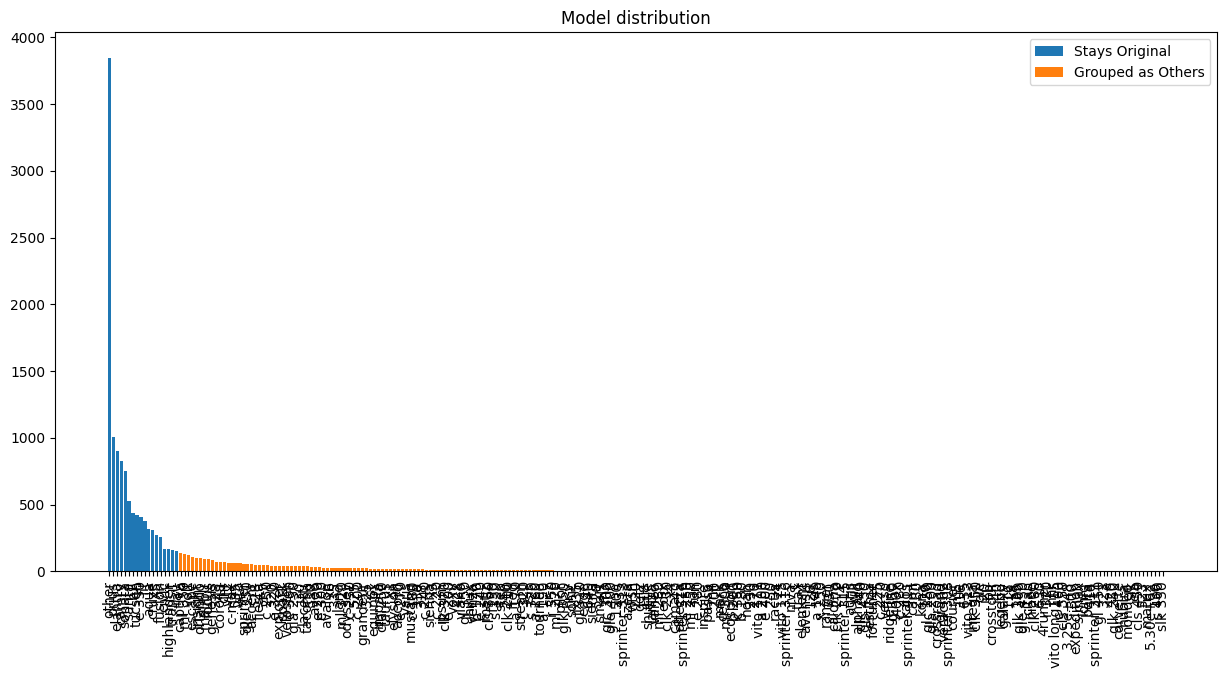

In [98]:
vc =new_df['Model'].value_counts()
min_counts = len(new_df['Model'])/100 #1% of data length
mod_vc =  dict()
mod_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        mod_vc[vc.index[i]] = vc.values[i]
        mod_vc_full[vc.index[i]] = 0
    else:
        mod_vc[vc.index[i]] = 0
        mod_vc_full[vc.index[i]] = vc.values[i]

plt.figure(figsize=(15,7))
plt.bar(range(len(mod_vc_full)), list(mod_vc_full.values()), align='center')
plt.bar(range(len(mod_vc)), list(mod_vc.values()), align='center')
plt.xticks(range(len(mod_vc)), list(mod_vc.keys()),rotation=90)
plt.legend(['Stays Original','Grouped as Others'])
plt.title('Model distribution')
plt.show()

In [99]:
for key, val in mod_vc_full.items():
    if mod_vc_full[key] == 0:
        mod_vc_full[key] = 'other'
    else:
        mod_vc_full[key] = key

new_df['Model'] = new_df['Model'].map(mod_vc_full)
new_df['Model'].unique()

array(['other', 'fit', 'santa', 'prius', 'sonata', 'e 350', 'elantra',
       'camry', 'transit', 'h1', 'aqua', 'civic', 'cruze', 'fusion',
       'tucson', 'highlander', 'x5', 'rav'], dtype=object)

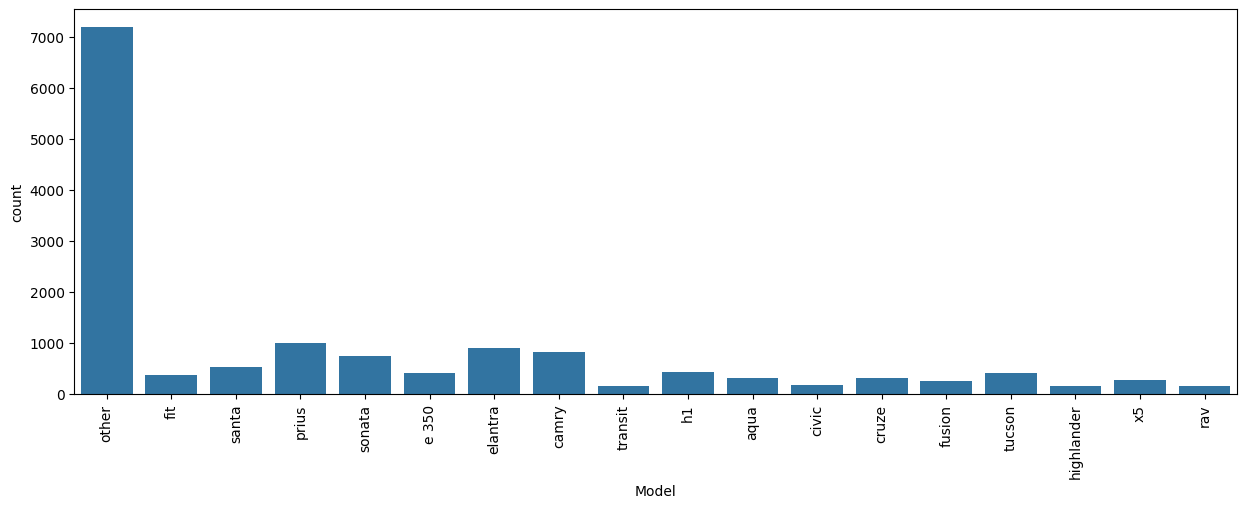

In [100]:
plt.figure(figsize=(15,5))
sns.countplot(x=new_df['Model'])
plt.xticks(rotation=90)
plt.show()

<hr><p style="font-family: verdona;"><b>Observation : </b><br>
We can visualize that model name feature is highly imbalanced .

<p style="font-family: verdona;"><b>Conclusion : </b><br>
Its better to drop this feature as it can affect the models prediction.<hr>

In [101]:
new_df.drop(columns=['Model'], inplace=True)
new_df.head()

,Price,Levy,Manufacturer,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume,Car_Age
0,13328,1399,other,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5,14
1,16621,1018,chevrolet,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0,13
2,8467,0,honda,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3,18
3,3607,862,ford,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5,13
4,11726,446,honda,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3,10


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Encoding Categoric to Numeric data

<hr><center><p style="font-family: verdona;"><b>Label encoding</b></center><hr>

In [102]:
new_df['Leather interior'] = new_df['Leather interior'].map({'Yes':1.0,'No':0.0})
new_df['Turbo'] = new_df['Turbo'].map({'Yes':1.0,'No':0.0})
new_df.head()

,Price,Levy,Manufacturer,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume,Car_Age
0,13328,1399,other,Jeep,1.0,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,0.0,3.5,14
1,16621,1018,chevrolet,Jeep,0.0,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,0.0,3.0,13
2,8467,0,honda,Hatchback,0.0,Petrol,200000,4.0,Variator,Front,1,Black,2,0.0,1.3,18
3,3607,862,ford,Jeep,1.0,Hybrid,168966,4.0,Automatic,4x4,0,White,0,0.0,2.5,13
4,11726,446,honda,Hatchback,1.0,Petrol,91901,4.0,Automatic,Front,0,Silver,4,0.0,1.3,10


<hr><center><p style="font-family: verdona;"><b>One hot encoding </b></center><hr> 

In [103]:
color_encoder = OneHotEncoder(sparse_output=False)
color_encoder

OneHotEncoder(sparse_output=False)

In [104]:
col_arr = color_encoder.fit_transform(new_df[['Color']])
feature_names = color_encoder.get_feature_names_out(['Color'])
col_enc = pd.DataFrame(col_arr, columns=feature_names)
print(col_enc.shape)
col_enc.head()

(14652, 6)


,Color_Black,Color_Blue,Color_Grey,Color_Others,Color_Silver,Color_White
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [105]:
dw_encoder = OneHotEncoder(sparse_output=False)
dw_encoder

OneHotEncoder(sparse_output=False)

In [106]:
dw_arr = dw_encoder.fit_transform(new_df[['Drive wheels']])
feature_names = dw_encoder.get_feature_names_out(['Drive wheels'])
dw_enc = pd.DataFrame(dw_arr, columns=feature_names)
print(dw_enc.shape)
dw_enc.head()

(14652, 3)


,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [107]:
gbt_encoder = OneHotEncoder(sparse_output=False)
gbt_encoder

OneHotEncoder(sparse_output=False)

In [108]:
gbt_arr = gbt_encoder.fit_transform(new_df[['Gear box type']])
feature_names = gbt_encoder.get_feature_names_out(['Gear box type'])
gbt_enc = pd.DataFrame(gbt_arr, columns=feature_names)
print(gbt_enc.shape)
gbt_enc.head()

(14652, 4)


,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [109]:
fuel_encoder = OneHotEncoder(sparse_output=False)
fuel_encoder

OneHotEncoder(sparse_output=False)

In [110]:
fuel_arr = fuel_encoder.fit_transform(new_df[['Fuel type']])
feature_names = fuel_encoder.get_feature_names_out(['Fuel type'])
fuel_enc = pd.DataFrame(fuel_arr, columns=feature_names)
print(fuel_enc.shape)
fuel_enc.head()

(14652, 6)


,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Other,Fuel type_Petrol
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [111]:
cat_encoder = OneHotEncoder(sparse_output=False)
cat_encoder

OneHotEncoder(sparse_output=False)

In [112]:
cat_arr = cat_encoder.fit_transform(new_df[['Category']])
feature_names = cat_encoder.get_feature_names_out(['Category'])
cat_enc = pd.DataFrame(cat_arr, columns=feature_names)
print(cat_enc.shape)
cat_enc.head()

(14652, 4)


,Category_Hatchback,Category_Jeep,Category_Others,Category_Sedan
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [113]:
man_encoder = OneHotEncoder(sparse_output=False)
man_encoder

OneHotEncoder(sparse_output=False)

In [114]:
man_arr = man_encoder.fit_transform(new_df[['Manufacturer']])
feature_names = man_encoder.get_feature_names_out(['Manufacturer'])
man_enc = pd.DataFrame(man_arr, columns=feature_names)
print(man_enc.shape)
man_enc.head()

(14652, 8)


,Manufacturer_bmw,Manufacturer_chevrolet,Manufacturer_ford,Manufacturer_honda,Manufacturer_hyundai,Manufacturer_mercedes-benz,Manufacturer_other,Manufacturer_toyota
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [115]:
new_df = new_df.drop(columns=['Manufacturer','Category', 'Fuel type','Gear box type','Drive wheels','Color'])
new_df.head()

,Price,Levy,Leather interior,Mileage,Cylinders,Wheel,Airbags,Turbo,Engine Volume,Car_Age
0,13328,1399,1.0,186005,6.0,0,12,0.0,3.5,14
1,16621,1018,0.0,192000,6.0,0,8,0.0,3.0,13
2,8467,0,0.0,200000,4.0,1,2,0.0,1.3,18
3,3607,862,1.0,168966,4.0,0,0,0.0,2.5,13
4,11726,446,1.0,91901,4.0,0,4,0.0,1.3,10


In [116]:
new_df = pd.concat([new_df, man_enc, cat_enc, fuel_enc, gbt_enc,dw_enc, col_enc], axis=1)
print(new_df.shape)
new_df.head()

(14652, 41)


,Price,Levy,Leather interior,Mileage,Cylinders,Wheel,Airbags,Turbo,Engine Volume,Car_Age,...,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Color_Black,Color_Blue,Color_Grey,Color_Others,Color_Silver,Color_White
0,13328,1399,1.0,186005,6.0,0,12,0.0,3.5,14,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16621,1018,0.0,192000,6.0,0,8,0.0,3.0,13,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8467,0,0.0,200000,4.0,1,2,0.0,1.3,18,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3607,862,1.0,168966,4.0,0,0,0.0,2.5,13,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11726,446,1.0,91901,4.0,0,4,0.0,1.3,10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [117]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14652 entries, 0 to 14651
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       14652 non-null  int64  
 1   Levy                        14652 non-null  int32  
 2   Leather interior            14652 non-null  float64
 3   Mileage                     14652 non-null  int64  
 4   Cylinders                   14652 non-null  float64
 5   Wheel                       14652 non-null  int64  
 6   Airbags                     14652 non-null  int64  
 7   Turbo                       14652 non-null  float64
 8   Engine Volume               14652 non-null  float64
 9   Car_Age                     14652 non-null  int64  
 10  Manufacturer_bmw            14652 non-null  float64
 11  Manufacturer_chevrolet      14652 non-null  float64
 12  Manufacturer_ford           14652 non-null  float64
 13  Manufacturer_honda          146

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Scaling data

In [118]:
scaling_cols = list()
for col in new_df.columns:
    if col != 'Price' :
        max_val = new_df[col].max()
        if max_val > 1.0:
            scaling_cols.append(col)
            print(' Feature : ', col,'\t Max value :  ',max_val)

 Feature :  Levy 	 Max value :   2209
 Feature :  Mileage 	 Max value :   357150
 Feature :  Cylinders 	 Max value :   16.0
 Feature :  Airbags 	 Max value :   16
 Feature :  Engine Volume 	 Max value :   3.5
 Feature :  Car_Age 	 Max value :   24


In [119]:
scaler = StandardScaler()
scaler

StandardScaler()

In [120]:
scaled_df = pd.DataFrame(scaler.fit_transform(new_df[scaling_cols]), columns=scaling_cols)
scaled_df.head()

,Levy,Mileage,Cylinders,Airbags,Engine Volume,Car_Age
0,1.762249,0.808454,1.855843,1.300916,2.306362,0.427223
1,0.913280,0.887614,1.855843,0.325778,1.460717,0.191941
2,-1.355093,0.993249,-0.406936,-1.136929,-1.414475,1.368349
3,0.565671,0.583466,-0.406936,-1.624498,0.615072,0.191941
4,-0.361287,-0.434126,-0.406936,-0.649360,-1.414475,-0.513904


In [121]:
new_df.drop(columns=scaling_cols, inplace=True)
new_df.head()

,Price,Leather interior,Wheel,Turbo,Manufacturer_bmw,Manufacturer_chevrolet,Manufacturer_ford,Manufacturer_honda,Manufacturer_hyundai,Manufacturer_mercedes-benz,...,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Color_Black,Color_Blue,Color_Grey,Color_Others,Color_Silver,Color_White
0,13328,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16621,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8467,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3607,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11726,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [122]:
cols = new_df.columns.tolist()
cols.extend(scaled_df.columns)
cols

['Price',
 'Leather interior',
 'Wheel',
 'Turbo',
 'Manufacturer_bmw',
 'Manufacturer_chevrolet',
 'Manufacturer_ford',
 'Manufacturer_honda',
 'Manufacturer_hyundai',
 'Manufacturer_mercedes-benz',
 'Manufacturer_other',
 'Manufacturer_toyota',
 'Category_Hatchback',
 'Category_Jeep',
 'Category_Others',
 'Category_Sedan',
 'Fuel type_CNG',
 'Fuel type_Diesel',
 'Fuel type_Hybrid',
 'Fuel type_LPG',
 'Fuel type_Other',
 'Fuel type_Petrol',
 'Gear box type_Automatic',
 'Gear box type_Manual',
 'Gear box type_Tiptronic',
 'Gear box type_Variator',
 'Drive wheels_4x4',
 'Drive wheels_Front',
 'Drive wheels_Rear',
 'Color_Black',
 'Color_Blue',
 'Color_Grey',
 'Color_Others',
 'Color_Silver',
 'Color_White',
 'Levy',
 'Mileage',
 'Cylinders',
 'Airbags',
 'Engine Volume',
 'Car_Age']

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Clean data

In [123]:
result = pd.concat([new_df, scaled_df], axis=1, ignore_index=True)
result.columns = cols
print(result.shape)
result.head()

(14652, 41)


,Price,Leather interior,Wheel,Turbo,Manufacturer_bmw,Manufacturer_chevrolet,Manufacturer_ford,Manufacturer_honda,Manufacturer_hyundai,Manufacturer_mercedes-benz,...,Color_Grey,Color_Others,Color_Silver,Color_White,Levy,Mileage,Cylinders,Airbags,Engine Volume,Car_Age
0,13328,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.762249,0.808454,1.855843,1.300916,2.306362,0.427223
1,16621,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.913280,0.887614,1.855843,0.325778,1.460717,0.191941
2,8467,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.355093,0.993249,-0.406936,-1.136929,-1.414475,1.368349
3,3607,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.565671,0.583466,-0.406936,-1.624498,0.615072,0.191941
4,11726,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.361287,-0.434126,-0.406936,-0.649360,-1.414475,-0.513904


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Handling Multicollinearity

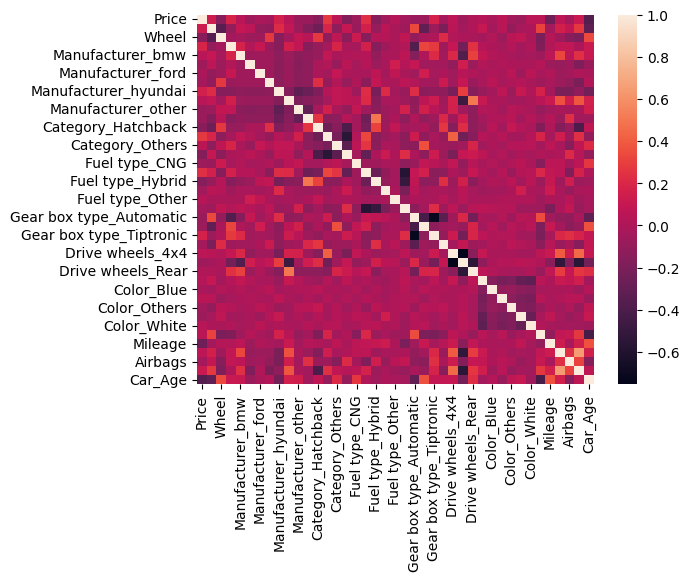

In [124]:
sns.heatmap(result.corr())
plt.show()

<hr><center><p style="font-family: verdona;">None of the features have more than 80% correlation which indicates, multicollinearity does not exist <hr>

In [125]:
result = result[:-10]
unseen = result[-10:]

In [126]:
X = result.drop(columns=['Price'])
y = result['Price']

print(X.shape, y.shape)

(14642, 40) (14642,)


<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Train Test Split

In [127]:
x_train,x_test,y_train,y_test = train_test_split(X, y,random_state=42,
                                                  test_size=0.2)

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Model Building and Training

In [128]:
dtree = DecisionTreeRegressor(max_depth=10, ccp_alpha=0.3, max_leaf_nodes=75)
rforest = RandomForestRegressor()
gb = GradientBoostingRegressor()
ada_b = AdaBoostRegressor()
xgb = XGBRegressor()

In [129]:
dtree.fit(x_train,y_train)
rforest.fit(x_train,y_train)
xgb.fit(x_train,y_train)
gb.fit(x_train,y_train)
ada_b.fit(x_train,y_train)

AdaBoostRegressor()

In [130]:
xgb_preds = xgb.predict(x_test)
gb_preds = gb.predict(x_test)
ada_b_preds = ada_b.predict(x_test)
tree_preds = dtree.predict(x_test)
rforest_preds = rforest.predict(x_test)

In [131]:
prediction_df = pd.DataFrame()
prediction_df['Acutal'] = y_test
prediction_df['XGB Preds'] = xgb_preds
prediction_df['Dtree Preds'] = tree_preds
prediction_df['RForest Preds'] = rforest_preds
prediction_df['GB Preds'] = gb_preds
prediction_df['Ada_b Preds'] = ada_b_preds
prediction_df

,Acutal,XGB Preds,Dtree Preds,RForest Preds,GB Preds,Ada_b Preds
4794,9722,13610.362305,6146.970721,11772.536000,13539.409248,35207.681840
10809,37799,31804.804688,33923.913684,29792.580000,30346.439636,37183.511853
8067,21012,24454.892578,26822.361809,21747.410000,29783.662943,42041.358319
8881,9252,8678.304688,10123.722449,10561.140000,12072.221431,36149.698718
8293,47076,40987.335938,33923.913684,45815.760000,36681.660494,35207.681840
...,...,...,...,...,...,...
14158,38445,45506.562500,43420.172973,40237.780000,42885.077937,44326.649355
10059,21410,17649.019531,16909.107443,22390.220000,17304.364119,32146.209788
4877,8624,9949.120117,9841.000000,10183.410000,9924.307590,21894.472409
5206,21953,18872.677734,5965.585097,18986.080000,12594.797134,24953.163654


<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Model Evaluation

In [132]:
def cal_error(y_true, y_predict):
    print(f'r square: {r2_score(y_true, y_predict)}')
    print(f'mae: {mean_absolute_error(y_true, y_predict)}')
    print(f'rmse root: {root_mean_squared_error(y_true, y_predict)}')
    print(f'mape: {mean_absolute_percentage_error(y_true, y_predict)}')

print('\nXGB results ')
cal_error(y_test, xgb_preds)
print('\nRForest results ')
cal_error(y_test, rforest_preds)
print('\nDTree results ')
cal_error(y_test, tree_preds)
print('\nAda_b results ')
cal_error(y_test, ada_b_preds)
print('\nGB results ')
cal_error(y_test, gb_preds)


XGB results 
r square: 0.7638409597833253
mae: 4647.894449400063
rmse root: 8421.031679797237
mape: 0.658177458825411

RForest results 
r square: 0.8051312537866334
mae: 4080.290629029737
rmse root: 7649.518672223326
mape: 0.5597123533524978

DTree results 
r square: 0.6103320030639718
mae: 6810.579353647069
rmse root: 10817.088505956473
mape: 1.1887628236969494

Ada_b results 
r square: -0.3290065993694029
mae: 16741.69660563068
rmse root: 19976.8303917242
mape: 4.315873013107246

GB results 
r square: 0.6735388281852022
mae: 6155.544642946568
rmse root: 9900.99363216136
mape: 1.2009722421896094


<hr><center><p style="font-family: verdona;">Testing on Completely unseen data 
(no chance of data leakage)<hr>

In [133]:
unseen_preds = rforest.predict(unseen.drop(columns=['Price']))
unseen_metrics = pd.DataFrame()
unseen_metrics['Actual Price'] = unseen['Price']
unseen_metrics['Predicted Price'] = unseen_preds
unseen_metrics

,Actual Price,Predicted Price
14632,13808,13265.31
14633,50037,49104.89
14634,6743,6774.18
14635,6586,11285.22
14636,1176,5988.63
14637,37633,38072.99
14638,26017,24389.23
14639,19444,20033.57
14640,8467,9123.24
14641,15681,20351.02


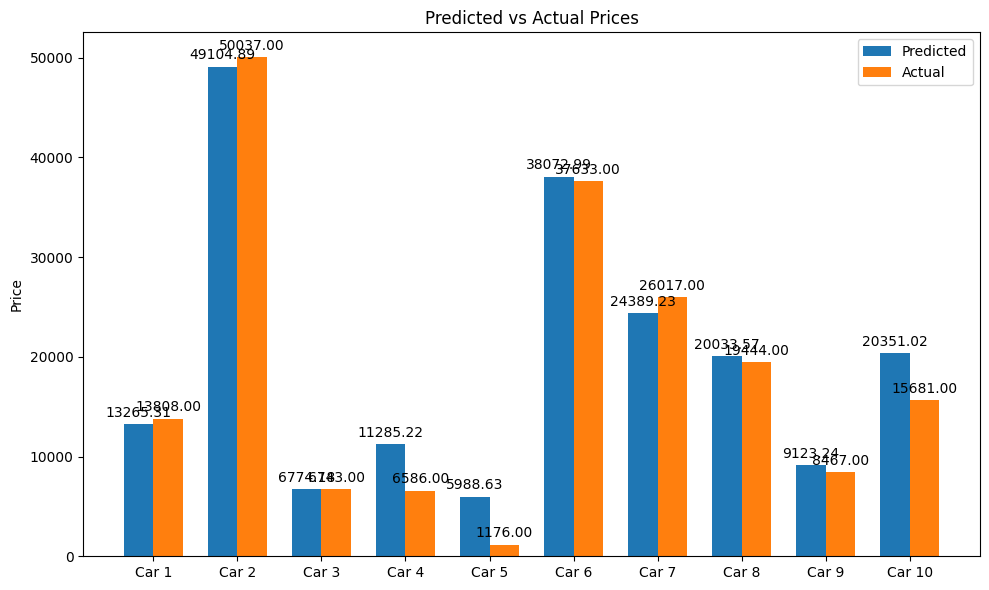

In [134]:
labels = [f'Car {i+1}' for i in range(len(unseen_metrics))]

x = np.arange(len(labels))  
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, unseen_metrics['Predicted Price'], width, label='Predicted')
rects2 = ax.bar(x + width/2, unseen_metrics['Actual Price'], width, label='Actual')

ax.set_ylabel('Price')
ax.set_title('Predicted vs Actual Prices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Most Important features

In [135]:
imp_df = pd.DataFrame(data=rforest.feature_importances_, index=rforest.feature_names_in_, columns=['Value']).sort_values(by='Value')

imp_df

,Value
Fuel type_CNG,0.000051
Gear box type_Manual,0.000860
Fuel type_Other,0.000941
Gear box type_Variator,0.000948
Wheel,0.001439
Fuel type_LPG,0.002146
Color_Blue,0.002496
Fuel type_Hybrid,0.002612
Category_Others,0.003072
Color_Others,0.003223


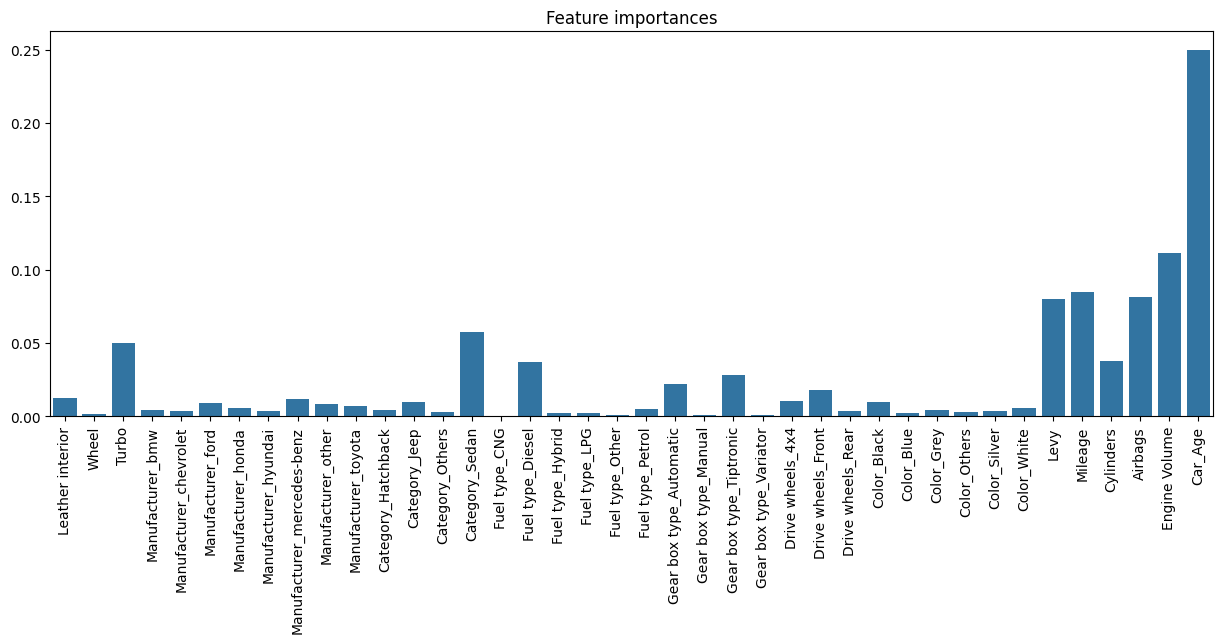

In [136]:
plt.figure(figsize=(15,5))
sns.barplot(x=rforest.feature_names_in_,y=rforest.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature importances')
plt.show()

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Hyperparameter Tuning

In [137]:
param_grid = {
   'n_estimators': [50, 100, 200, 300, 400],                 
   'max_depth': [10, 20, 30, 40, 50],                 
   'min_samples_split': [2, 5, 10, 15, 20],                 
   'min_samples_leaf': [1, 2, 4, 6, 8],                 
   'max_features': ['sqrt', 'log2', None],                 
   'bootstrap': [True, False],                 
}

rf = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=rf, 
        param_distributions=param_grid, 
        n_iter=100,    
        cv=3,          
        verbose=2,     
        random_state=42, 
        n_jobs=-1,     
        scoring='r2')  

random_search.fit(x_train, y_train)
print("Best parameters found:", random_search.best_params_)

best_model = random_search.best_estimator_
score = best_model.score(x_test, y_test)
print("Test set score:", score)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'bootstrap': True}
Test set score: 0.8024570805394274


In [138]:
rforest = RandomForestRegressor(n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_depth=30, bootstrap=True, max_features=None)

rforest.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, max_features=None, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=400)

In [139]:
rf_preds = rforest.predict(x_test)

In [140]:
prediction_df = pd.DataFrame()
prediction_df['Acutal'] = y_test
prediction_df['RForest Preds'] = rf_preds
prediction_df

,Acutal,RForest Preds
4794,9722,11595.332300
10809,37799,29053.241107
8067,21012,23675.842888
8881,9252,10847.663150
8293,47076,45735.532535
...,...,...
14158,38445,41145.607279
10059,21410,22028.880344
4877,8624,10667.471923
5206,21953,19045.421703


In [141]:
print('\nRForest results ')
cal_error(y_test, rf_preds)


RForest results 
r square: 0.8013351799260316
mae: 4199.147699170629
rmse root: 7723.666226491383
mape: 0.5969584895511955


<hr><p style="font-family: verdona;">The model performace is almost the same<hr>

In [142]:
new_preds = rforest.predict(unseen.drop(columns=['Price']))
unseen_metrics['New Predictions'] = new_preds
unseen_metrics

,Actual Price,Predicted Price,New Predictions
14632,13808,13265.31,13004.898840
14633,50037,49104.89,47905.175032
14634,6743,6774.18,7495.073282
14635,6586,11285.22,11134.293823
14636,1176,5988.63,8449.358298
14637,37633,38072.99,38996.649309
14638,26017,24389.23,23391.086812
14639,19444,20033.57,20564.036657
14640,8467,9123.24,9405.254813
14641,15681,20351.02,22710.907377


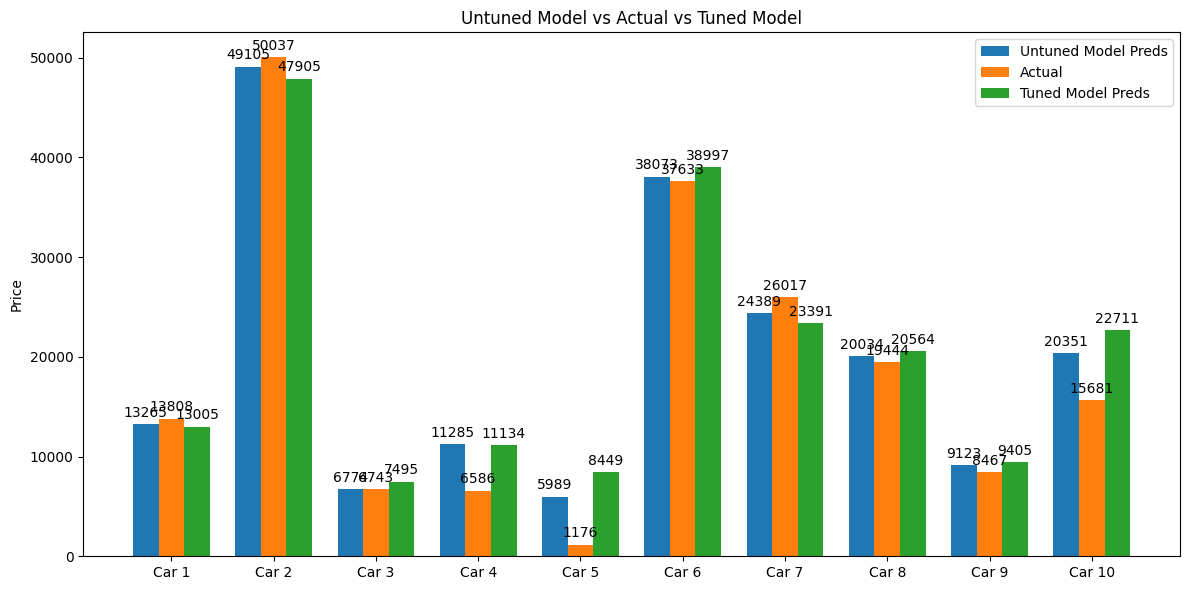

In [143]:
labels = [f'Car {i+1}' for i in range(len(unseen_metrics))]
x = np.arange(len(labels))
width = 0.25  

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, unseen_metrics['Predicted Price'], width, label='Untuned Model Preds')
rects2 = ax.bar(x, unseen_metrics['Actual Price'], width, label='Actual')
rects3 = ax.bar(x + width, unseen_metrics['New Predictions'], width, label='Tuned Model Preds')

ax.set_ylabel('Price')
ax.set_title('Untuned Model vs Actual vs Tuned Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


<div style="background-color: red;">
  <h2 style="font-family: Arial; color: cyan; text-align: center;">Saving Encoders,Scaler and Model

In [144]:
with open('feature_encoders/color_encoder.pkl', 'wb')as file:
    pickle.dump(color_encoder, file)

with open('feature_encoders/dw_encoder.pkl', 'wb')as file:
    pickle.dump(dw_encoder, file)

with open('feature_encoders/gbt_encoder.pkl', 'wb')as file:
    pickle.dump(gbt_encoder, file)

with open('feature_encoders/fuel_encoder.pkl', 'wb')as file:
    pickle.dump(fuel_encoder, file)

with open('feature_encoders/cat_encoder.pkl', 'wb')as file:
    pickle.dump(cat_encoder, file)
    
with open('feature_encoders/man_encoder.pkl', 'wb')as file:
    pickle.dump(man_encoder, file)

with open('scaler/scaler.pkl', 'wb')as file :
    pickle.dump(scaler, file)

with open('model/rforest_model.pkl', 'wb') as file:
    pickle.dump(rforest, file)

<div style="background-color: red;">
  <h2 style="font-family: Arial; color: cyan; text-align: center;">Loading Encoders, Scaler and Model

In [145]:
with open('feature_encoders/color_encoder.pkl', 'rb')as file:
    color_encoder = pickle.load(file)

with open('feature_encoders/dw_encoder.pkl', 'rb')as file:
    dw_encoder = pickle.load(file)

with open('feature_encoders/gbt_encoder.pkl', 'rb')as file:
    gbt_encoder = pickle.load(file) 

with open('feature_encoders/fuel_encoder.pkl', 'rb')as file:
    fuel_encoder = pickle.load(file)

with open('feature_encoders/cat_encoder.pkl', 'rb')as file:
    cat_encoder = pickle.load(file)
    
with open('feature_encoders/man_encoder.pkl', 'rb')as file:
    man_encoder = pickle.load(file)

with open('scaler/scaler.pkl', 'rb')as file :
    scaler = pickle.load(file)

with open('model/rforest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

<div style="background-color: red;">
  <h2 style="font-family: Arial; color: cyan; text-align: center;">Building Pipeline

In [146]:
def create_df(id, levy, man, mod, yr, cat, leather, fuel, eng, mil, cy, gear, dw, doors, steer, col, airbags):

    data = pd.DataFrame({
        'ID': [id],
        'Levy': [levy],
        'Manufacturer': [man],
        'Model': [mod],
        'Prod. year': [yr],
        'Category': [cat],
        'Leather interior': [leather],
        'Fuel type': [fuel],
        'Engine volume': [eng],
        'Mileage': [mil],
        'Cylinders': [cy],
        'Gear box type': [gear],
        'Drive wheels': [dw],
        'Doors': [doors],
        'Wheel': [steer],
        'Color': [col],
        'Airbags': [airbags]
    })
    
    return data

def check_df(df):
    sum = 0
    cols = ['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year','Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage','Cylinders',
    'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color','Airbags']

    allowed_null = ['ID', 'Model', 'Doors']

    if df.shape[1] == 17:
        for col1,col2 in zip(df.columns, cols):
            if col1 == col2:
                sum +=1
                if col1 not in allowed_null and df[col1].isnull().sum() > 0 :
                    return f'Missing important data in "{col1}" column '
                else :
                    df[col1] = df[col1].fillna(0)

    else :
        return 'Incorrect data format'
    
    if len(cols) == sum:
        df.reset_index(inplace=True)
        df.drop(columns=['index'], inplace=True)
        return df
    else : 
        return 'Incorrect data format'
    
def drop_features(df):
    features = ['ID', 'Model', 'Doors']
    df.drop(columns=features,inplace=True)
    return df

def clean_Levy(df):
    def levy_handler(val):
        try:
            val = int(val)
        except Exception:
            val = 0
        return val
    df['Levy'] = df['Levy'].apply(levy_handler)
    df['Levy'] = df['Levy'].astype(int)
    return df

def clean_Mileage(df):
    def mileage_handler(val):
        if 'km' in val : 
            val = int(val[:-2].strip())
        else :
            pass
        return val
    
    df['Mileage']= df['Mileage'].apply(mileage_handler)
    return df

def clean_EngVol(df):
    def eng_vol_handler():
        turbos = list()
        values = list()
        for val in df['Engine volume']:
            try : 
                val = float(val)
                turbo = 'No'
            except:
                val = val.split(' ')[0]
                turbo = 'Yes'
            turbos.append(turbo)
            values.append(val)
        return turbos,values
    df['Turbo'], df['Engine Volume']= eng_vol_handler()
    df.drop(columns=['Engine volume'], inplace=True)
    df['Engine Volume'] = df['Engine Volume'].astype(float)

    return df

def clean_Wheel(df):
    def wheel_handler(val):
        if 'right' in val.lower():
            return 1
        else :
            return 0

    df['Wheel'] = df['Wheel'].apply(wheel_handler)
    return df

def clean_Color(df):
    color_uni = ['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red', 'Sky blue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige', 'Carnelian red', 'Purple', 'Pink']

    color_vc ={'Black': 0, 'White': 0, 'Silver': 0, 'Grey': 0, 'Blue': 0, 'Red': 1, 'Green': 1, 'Brown': 1, 'Carnelian red': 1, 'Golden': 1, 'Sky blue': 1, 'Beige': 1, 'Yellow': 1, 'Orange': 1, 'Purple': 1, 'Pink': 1}

    new_colors = dict()

    for item in df['Color']:
        if item not in color_uni:
            new_colors[item] = 'Others'

    for key, val in color_vc.items():
        if val > 0:
            new_colors[key] = 'Others'
        else : 
            new_colors[key] = key

    df['Color'] = df['Color'].map(new_colors)
    return df

def clean_FuelType(df):
    fuel_uni = ['Petrol', 'Diesel', 'Hydrogen', 'Hybrid', 'Plug-in Hybrid', 'LPG', 'CNG']
    fuel_map = dict()
    for i in df['Fuel type']:
        if i not in fuel_uni:
            fuel_map[i] = 'Other'
        elif i == 'Plug-in Hybrid' or i == 'Hydrogen':
            fuel_map[i] = 'Other'
        else:
            fuel_map[i] = i
            
    df['Fuel type'] = df['Fuel type'].map(fuel_map)
    return df

def clean_Category(df):
    cat_uni = ['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon', 'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine', 'Pickup']

    cat_map = {'Sedan': 'Sedan', 'Jeep': 'Jeep', 'Hatchback': 'Hatchback',
 'Minivan': 'Others', 'Coupe': 'Others', 'Universal': 'Others', 'Microbus': 'Others', 'Goods wagon': 'Others', 'Pickup': 'Others', 'Cabriolet': 'Others',
 'Limousine': 'Others'}
    
    for category in df['Category']:
        if category not in cat_uni:
            cat_map[category] = 'Others'

    df['Category'] = df['Category'].map(cat_map)
    return df

def clean_Manufacturer(df):
    def lowercase(row_val):
        return row_val.lower().strip()
    df['Manufacturer'] = df['Manufacturer'].apply(lowercase)
    
    man_uni = ['lexus', 'chevrolet', 'honda', 'ford', 'hyundai', 'toyota', 'mercedes-benz', 'opel', 'porsche', 'bmw', 'jeep', 'volkswagen', 'audi', 'renault','nissan', 'subaru', 'daewoo', 'kia', 'mitsubishi', 'ssangyong', 'mazda', 'gmc','fiat', 'infiniti', 'alfa romeo', 'suzuki', 'acura', 'lincoln', 'vaz', 'gaz','citroen', 'land rover', 'mini', 'dodge', 'chrysler', 'jaguar', 'isuzu', 'skoda','daihatsu', 'buick', 'tesla', 'cadillac', 'peugeot', 'bentley', 'volvo', 'სხვა','haval', 'hummer', 'scion', 'uaz', 'mercury', 'zaz', 'rover', 'seat', 'lancia','moskvich', 'maserati', 'ferrari', 'saab', 'lamborghini', 'rolls-royce', 'pontiac', 'saturn', 'aston martin', 'greatwall']

    others = ['bmw', 'nissan', 'lexus', 'volkswagen', 'ssangyong', 'kia', 'subaru', 'audi', 'mitsubishi', 'opel', 'mazda', 'daewoo', 'jeep', 'fiat', 'suzuki', 'mini', 'dodge', 'land rover', 'renault', 'jaguar', 'skoda', 'chrysler', 'porsche', 'peugeot', 'buick', 'vaz', 'infiniti', 'volvo', 'acura', 'citroen', 'gmc', 'scion', 'lincoln', 'cadillac', 'alfa romeo', 'mercury', 'daihatsu', 'maserati', 'gaz', 'saab', 'seat', 'other', 'lancia', 'haval', 'hummer', 'pontiac', 'saturn', 'greatwall']

    man_map = dict()

    for val in df['Manufacturer']:
        if val not in man_uni :
            man_map[val] = 'other'
        elif val in others:
            man_map[val] = 'other'
        else : 
            man_map[val] = val

    df['Manufacturer'] = df['Manufacturer'].map(man_map)
    return df

def clean_ProdYr(df):
    def calc_age(year):
        year = int(year)
        age = 2024 - year
        return age
    df['Car_Age'] = df['Prod. year'].apply(calc_age)
    df.drop(columns=['Prod. year'], inplace=True)
    return df

def clean_Turbo(df):
    df['Turbo'] = df['Turbo'].map({'Yes':1.0,'No':0.0})
    return df

def clean_Lint(df):
    df['Leather interior'] = df['Leather interior'].map({'Yes':1.0,
                                                                 'No':0.0})
    return df

def encoding(df, man_encoder, cat_encoder,fuel_encoder, 
             gbt_encoder, dw_encoder,color_encoder):
    man_pred = man_encoder.transform(df[['Manufacturer']])
    feature_names = man_encoder.get_feature_names_out(['Manufacturer'])
    man_pred = pd.DataFrame(man_pred, columns=feature_names)

    cat_pred = cat_encoder.transform(df[['Category']])
    feature_names = cat_encoder.get_feature_names_out(['Category'])
    cat_pred = pd.DataFrame(cat_pred, columns=feature_names)

    fuel_pred = fuel_encoder.transform(df[['Fuel type']])
    feature_names = fuel_encoder.get_feature_names_out(['Fuel type'])
    fuel_pred = pd.DataFrame(fuel_pred, columns=feature_names)

    gbt_pred = gbt_encoder.transform(df[['Gear box type']])
    feature_names = gbt_encoder.get_feature_names_out(['Gear box type'])
    gbt_pred = pd.DataFrame(gbt_pred, columns=feature_names)

    dw_pred = dw_encoder.transform(df[['Drive wheels']])
    feature_names = dw_encoder.get_feature_names_out(['Drive wheels'])
    dw_pred = pd.DataFrame(dw_pred, columns=feature_names)

    col_pred = color_encoder.transform(df[['Color']])
    feature_names = color_encoder.get_feature_names_out(['Color'])
    col_pred = pd.DataFrame(col_pred, columns=feature_names)
    
    df.drop(columns=['Manufacturer', 'Category', 'Fuel type', 'Gear box type',
                     'Drive wheels', 'Color'], inplace=True)
    df = pd.concat([df, man_pred, cat_pred, fuel_pred, gbt_pred,dw_pred, col_pred], axis=1)
    return df

def scaling(df,scaler):
    scaling_cols =['Levy','Mileage','Cylinders','Airbags','Engine Volume','Car_Age']
    scaled_df = pd.DataFrame(scaler.transform(df[scaling_cols]), columns=scaling_cols)
    df.drop(columns=scaling_cols, inplace=True)
    df = pd.concat([df, scaled_df], axis=1)
    return df

def entire_pipeline(df, man_encoder, cat_encoder,fuel_encoder, 
    gbt_encoder, dw_encoder,color_encoder,scaler):
    
    data = check_df(df)
    data = drop_features(data)
    data = clean_Levy(data)
    data = clean_Mileage(data)
    data = clean_EngVol(data)
    data = clean_Wheel(data)
    data = clean_Color(data)
    data = clean_FuelType(data)
    data = clean_Category(data)
    data = clean_Manufacturer(data)
    data = clean_ProdYr(data)
    data = clean_Turbo(data)
    data = clean_Lint(data)
    data = encoding(data, man_encoder, cat_encoder,fuel_encoder, 
             gbt_encoder, dw_encoder,color_encoder)
    data = scaling(data,scaler)

    return data

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;"> Using Pipeline to process Raw data

In [147]:
load_df = pd.read_csv('car_price_prediction.csv')
testing_data = load_df[:10]
testing_data.shape

(10, 18)

In [148]:
data = entire_pipeline(testing_data.drop(columns=['Price']), man_encoder, cat_encoder,fuel_encoder, gbt_encoder, dw_encoder,color_encoder, scaler)
data

,Leather interior,Wheel,Turbo,Manufacturer_bmw,Manufacturer_chevrolet,Manufacturer_ford,Manufacturer_honda,Manufacturer_hyundai,Manufacturer_mercedes-benz,Manufacturer_other,...,Color_Grey,Color_Others,Color_Silver,Color_White,Levy,Mileage,Cylinders,Airbags,Engine Volume,Car_Age
0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.762249,0.808454,1.855843,1.300916,2.306362,0.427223
1,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.913280,0.887614,1.855843,0.325778,1.460717,0.191941
2,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.355093,0.993249,-0.406936,-1.136929,-1.414475,1.368349
3,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.565671,0.583466,-0.406936,-1.624498,0.615072,0.191941
4,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.361287,-0.434126,-0.406936,-0.649360,-1.414475,-0.513904
5,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.630290,0.477369,-0.406936,-0.649360,-0.230573,-0.984467
6,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.340616,1.771102,-0.406936,1.300916,-0.568831,0.427223
7,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.318333,1.206076,-0.406936,1.300916,0.445943,-0.278622
8,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.477157,3.608617,-0.406936,1.300916,0.615072,-0.513904
9,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-1.355093,0.049139,1.855843,1.300916,2.306362,1.133068


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Predicting on processed data

In [149]:
preds = loaded_model.predict(data)
actual = testing_data['Price']
pred_df = pd.DataFrame()
pred_df['Actual Price'] = actual
pred_df['Predicted Price'] = preds
pred_df

,Actual Price,Predicted Price
0,13328,13494.348276
1,16621,18047.286057
2,8467,8392.530347
3,3607,3521.350143
4,11726,13331.342627
5,39493,40991.335889
6,1803,1937.766778
7,549,912.287127
8,1098,9580.616106
9,26657,19538.018879


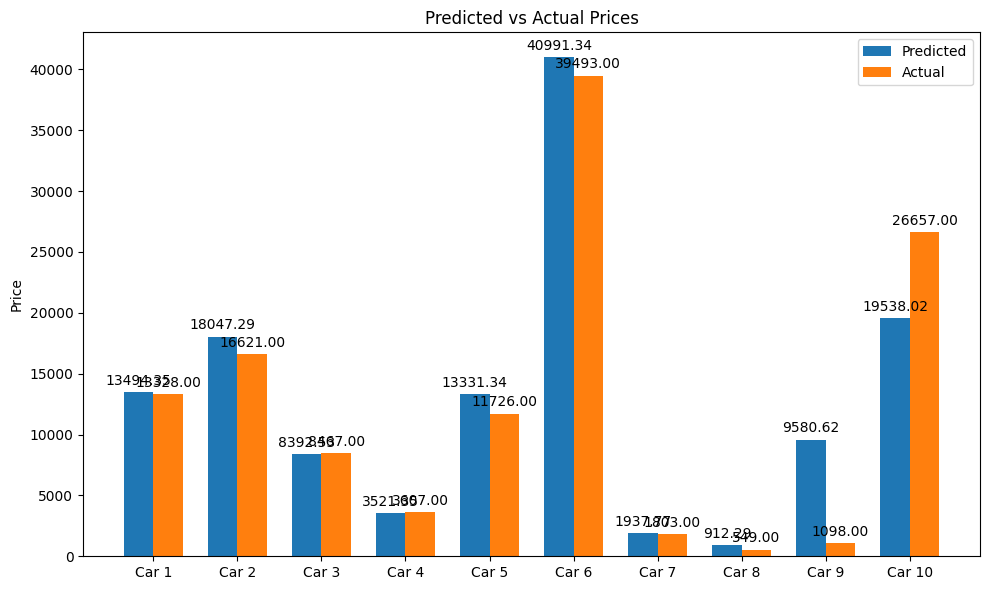

In [150]:
labels = [f'Car {i+1}' for i in range(len(pred_df))]

x = np.arange(len(labels))  
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, pred_df['Predicted Price'], width, label='Predicted')
rects2 = ax.bar(x + width/2, pred_df['Actual Price'], width, label='Actual')

ax.set_ylabel('Price')
ax.set_title('Predicted vs Actual Prices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Processing and Predicting on a random sample

In [151]:
choices = [x for x in range(1, len(load_df))]
sample = load_df.iloc[random.choice(choices)]
sample

ID                       45789700
Price                       17249
Levy                            -
Manufacturer        MERCEDES-BENZ
Model                   ML 55 AMG
Prod. year                   2002
Category                     Jeep
Leather interior              Yes
Fuel type                  Petrol
Engine volume                 5.5
Mileage                  24968 km
Cylinders                     8.0
Gear box type           Tiptronic
Drive wheels                  4x4
Doors                      04-May
Wheel                  Left wheel
Color                      Silver
Airbags                        12
Name: 13908, dtype: object

In [152]:
n = create_df(np.NaN, sample['Levy'], sample['Manufacturer'], np.NaN, sample['Prod. year'], sample['Category'],sample['Leather interior'], sample['Fuel type'],sample['Engine volume'], sample['Mileage'],sample['Cylinders'],sample['Gear box type'], sample['Drive wheels'],np.NaN,sample['Wheel'], sample['Color'], sample['Airbags'])
n

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,NaN,-,MERCEDES-BENZ,NaN,2002,Jeep,Yes,Petrol,5.5,24968 km,8.0,Tiptronic,4x4,NaN,Left wheel,Silver,12


In [153]:
data = entire_pipeline(n, man_encoder, cat_encoder,fuel_encoder, gbt_encoder, dw_encoder,color_encoder, scaler)
data

,Leather interior,Wheel,Turbo,Manufacturer_bmw,Manufacturer_chevrolet,Manufacturer_ford,Manufacturer_honda,Manufacturer_hyundai,Manufacturer_mercedes-benz,Manufacturer_other,...,Color_Grey,Color_Others,Color_Silver,Color_White,Levy,Mileage,Cylinders,Airbags,Engine Volume,Car_Age
0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,-1.355093,-1.317931,4.118622,1.300916,5.688941,2.309476


In [154]:
prediction = loaded_model.predict(data)
actual = sample['Price']

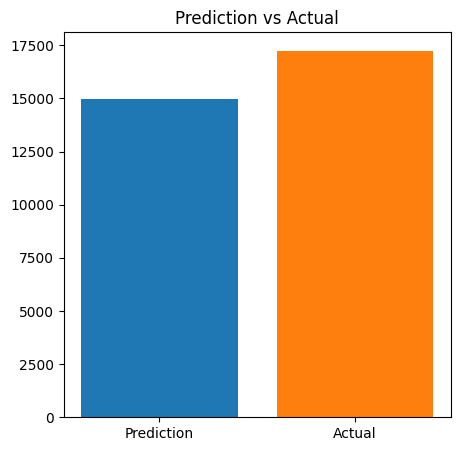

In [155]:
plt.figure(figsize=(5,5))
plt.bar(x='Prediction', height=prediction)
plt.bar(x='Actual', height=actual)
plt.title('Prediction vs Actual')
plt.show()

<hr><p style="font-family: verdona;"><b>The app.py creates a website and makes predictions user friendly</b><hr>